# ML End-to-End Projekt: Student Performance Prediction

## Header
**Autoren:** David Luck, Simon Hüberli-Carrasco  
**Datum:** HS 2025  
**OST - Ostschweizer Fachhochschule**

Quelle des Datensatz: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

![OST Logo](https://www.ost.ch/de/mediathek/_jcr_content/root/stage/image.img.3.high.jpg/1662646826512.jpg)

---

## Inhaltsverzeichnis

1. [Einleitung](#1-einleitung)
2. [Zielsetzung und Vorgehensweise](#2-zielsetzung-und-vorgehensweise)
3. [Explorative Datenanalyse (EDA)](#3-explorative-datenanalyse-eda)
   - 3.1 [Daten laden und erste Inspektion](#31-daten-laden-und-erste-inspektion)
   - 3.2 [Datenbereinigung und Verständnis](#32-datenbereinigung-und-verständnis)
   - 3.3 [Univariate Analyse](#33-univariate-analyse)
   - 3.4 [Beschreibung wichtiger Features](#34-beschreibung-wichtiger-features)
   - 3.5 [Bivariate Analyse](#35-bivariate-analyse)
   - 3.6 [Wichtigste Erkenntnisse aus der EDA](#36-wichtigste-erkenntnisse-aus-der-eda)
4. [Data Preprocessing und Feature Engineering](#4-data-preprocessing-und-feature-engineering)
5. [Modellvergleich (No Free Lunch)](#5-modellvergleich-no-free-lunch)
   - 5.1 [Linear Regression](#51-linear-regression)
   - 5.2 [Polynomial Regression](#52-polynomial-regression)
   - 5.3 [Random Forest](#53-random-forest)
6. [Validierung und Vergleich](#6-validierung-und-vergleich)
7. [Modellauswahl und Begründung](#7-modellauswahl-und-begründung)
8. [Schlussfolgerung und Ausblick](#8-schlussfolgerung-und-ausblick)
9. [Referenzen](#9-referenzen)
10. [Eigenständigkeitserklärung](#10-eigenständigkeitserklärung)

---

## 1. Einleitung

### Beschreibung der Aufgabe
Dieses Projekt befasst sich mit der Vorhersage der Prüfungsleistung (Exam_Score) von Studenten basierend auf verschiedenen Einflussfaktoren. Der Datensatz enthält 20 verschiedene Features, die verschiedene Aspekte des studentischen Lebens abbilden, darunter Lerngewohnheiten (Hours_Studied), Anwesenheit (Attendance), sozioökonomische Faktoren (Family_Income, Parental_Education_Level), persönliche Faktoren (Sleep_Hours, Motivation_Level) sowie schulische Rahmenbedingungen (Teacher_Quality, School_Type).

## 2. Zielsetzung und Vorgehensweise

### Zielsetzung
**Hauptziel:** Entwicklung eines Machine Learning Modells zur präzisen Vorhersage des Exam_Score von Studenten (kontinuierlicher Wert zwischen 0 und 100 Punkten).

**Teilziele:**
1. Identifikation der wichtigsten Einflussfaktoren auf die Prüfungsleistung
2. Entwicklung einer robusten ML-Pipeline für Datenverarbeitung und Modelltraining
3. Vergleich verschiedener Regressionsalgorithmen
4. Optimierung des besten Modells durch Hyperparameter-Tuning

### Ansatz
1. **Explorative Datenanalyse (EDA):** Verstehen der Datenstruktur, Identifikation von Mustern, Ausreissern und Korrelationen
2. **Data Preprocessing:** Behandlung fehlender Werte, Feature Engineering, Encoding kategorischer Variablen
3. **Feature Selection:** Identifikation der relevantesten Features
4. **Pipeline-Entwicklung:** Aufbau einer automatisierten ML-Pipeline für reproduzierbare Ergebnisse
5. **Modellvergleich:** Evaluation verschiedener Algorithmen (No Free Lunch Theorem)
6. **Hyperparameter-Tuning:** Optimierung des besten Modells mittels Grid Search oder Random Search
7. **Kreuzvalidierung:** Robuste Bewertung der Modellleistung
8. **Final Testing:** Evaluation auf Test-Set

### Metrik
**Primäre Metrik:** **RMSE (Root Mean Squared Error)**  
- RMSE bestraft grössere Fehler stärker und ist gut interpretierbar in den Original-Einheiten (Punkte)

---

## 3. Explorative Datenanalyse (EDA)

### 3.1 Daten laden und erste Inspektion

---

In [15]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Regression Modelle
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metriken
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Weitere Libraries nach Bedarf
import warnings
warnings.filterwarnings('ignore')

# Plotting Einstellungen
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [16]:
# Daten laden
df = pd.read_csv('StudentPerformanceFactors.csv')

In [17]:
# Erste Inspektion
print("=== Datensatz Übersicht ===")
print(f"Anzahl Zeilen: {df.shape[0]}")
print(f"Anzahl Spalten: {df.shape[1]}")
print("\n=== Erste 5 Zeilen ===")
display(df.head())
print("\n=== Datentypen ===")
print(df.dtypes)
print("\n=== Fehlende Werte ===")
print(df.isnull().sum())
print("\n=== Statistische Kennzahlen ===")
display(df.describe())

=== Datensatz Übersicht ===
Anzahl Zeilen: 6607
Anzahl Spalten: 20

=== Erste 5 Zeilen ===


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



=== Datentypen ===
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

=== Fehlende Werte ===
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Prev

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### 3.2 Datenbereinigung und Verständnis

---

In [18]:
# Fehlende Werte behandeln
# Insgesamt sind nur wenige (64) fehlende Werte vorhanden, deshalb löschen wir diese Zeilen
df.dropna(inplace=True)

# Duplikate prüfen
df.duplicated().sum()



np.int64(0)

In [19]:
# Kategorische Variablen identifizieren und deren Unique Values anzeigen
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print (df[col].values)



Parental_Involvement: 3 unique values
['Low' 'Low' 'Medium' ... 'Medium' 'High' 'Medium']
Access_to_Resources: 3 unique values
['High' 'Medium' 'Medium' ... 'Low' 'High' 'Low']
Extracurricular_Activities: 2 unique values
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
Motivation_Level: 3 unique values
['Low' 'Low' 'Medium' ... 'Low' 'High' 'Medium']
Internet_Access: 2 unique values
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
Family_Income: 3 unique values
['Low' 'Medium' 'Medium' ... 'Low' 'Low' 'Medium']
Teacher_Quality: 3 unique values
['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']
School_Type: 2 unique values
['Public' 'Public' 'Public' ... 'Public' 'Private' 'Public']
Peer_Influence: 3 unique values
['Positive' 'Negative' 'Neutral' ... 'Negative' 'Positive' 'Positive']
Learning_Disabilities: 2 unique values
['No' 'No' 'No' ... 'No' 'No' 'No']
Parental_Education_Level: 3 unique values
['High School' 'College' 'Postgraduate' ... 'Postgraduate' 'High School'
 'Postgraduate']
Distan

### 3.3 Univariate Analyse

Analyse einzelner Variablen zur Verteilungsanalyse

---

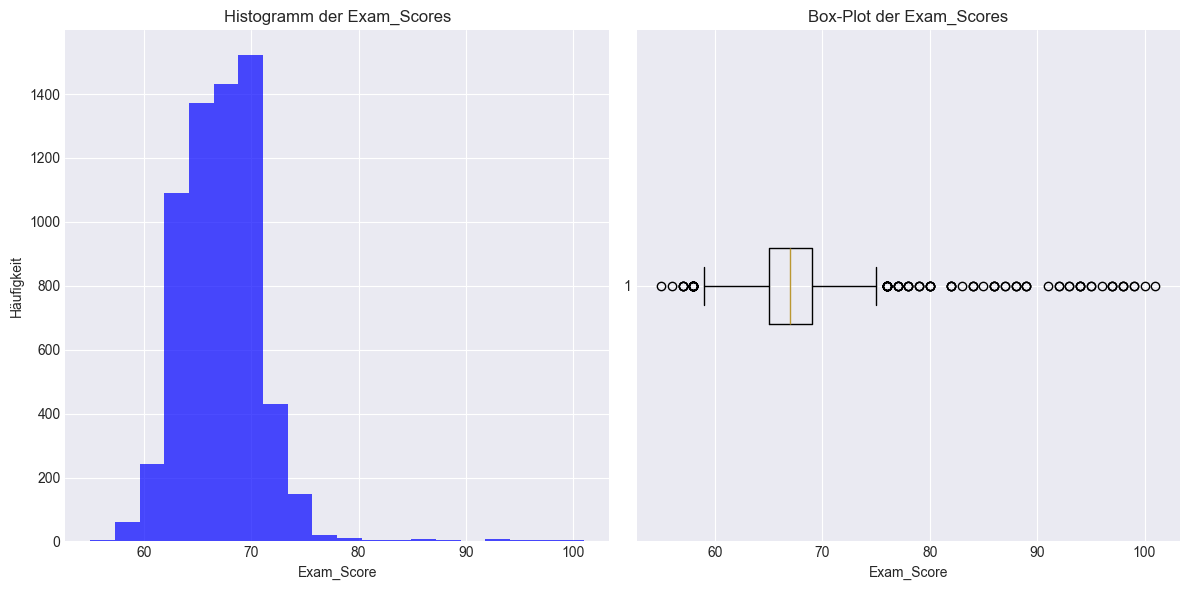

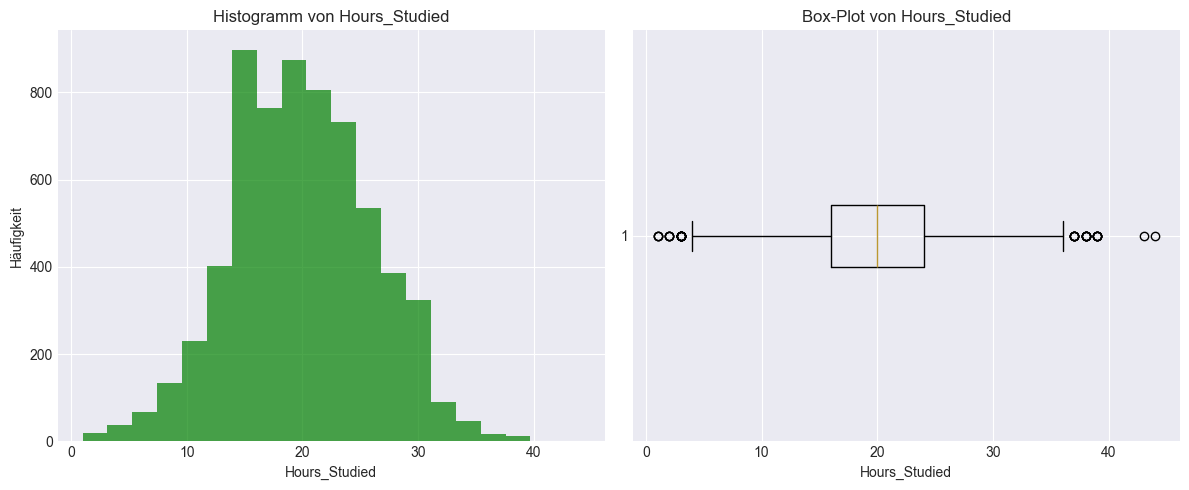

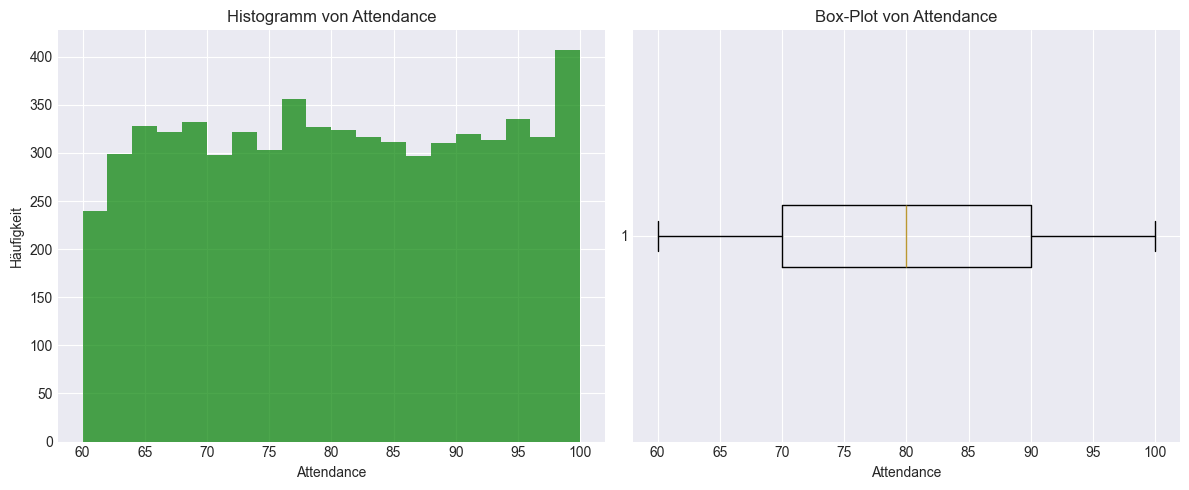

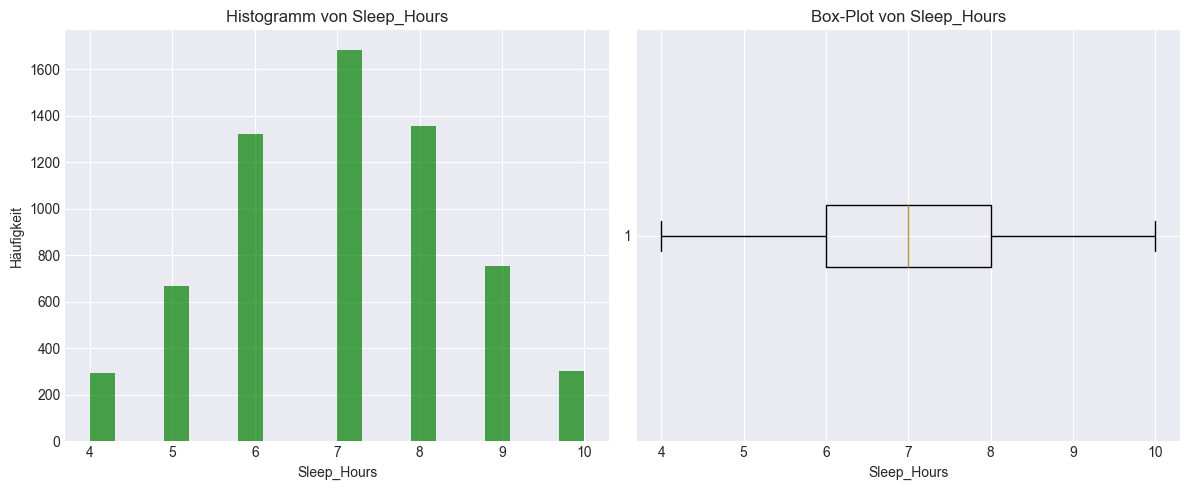

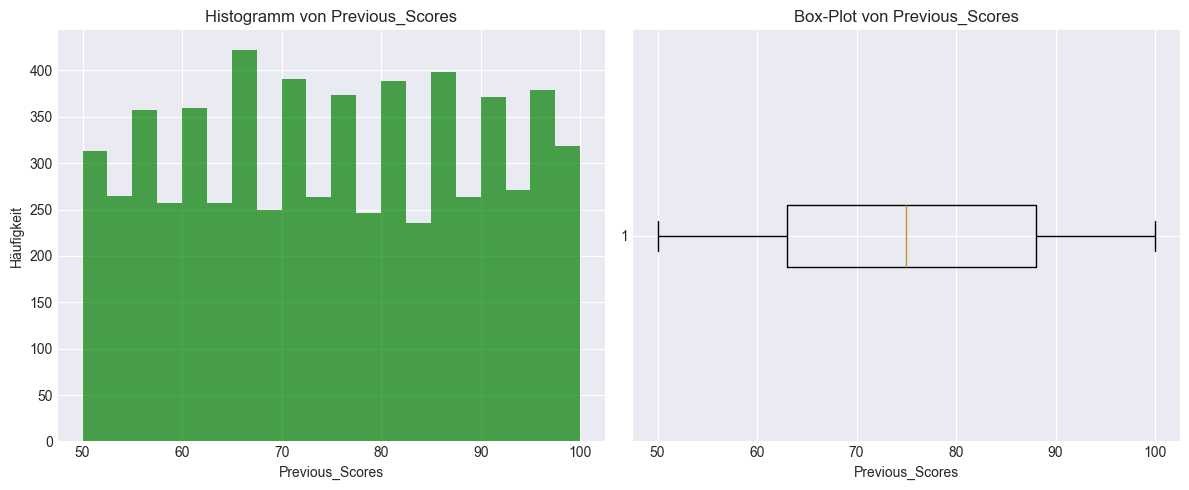

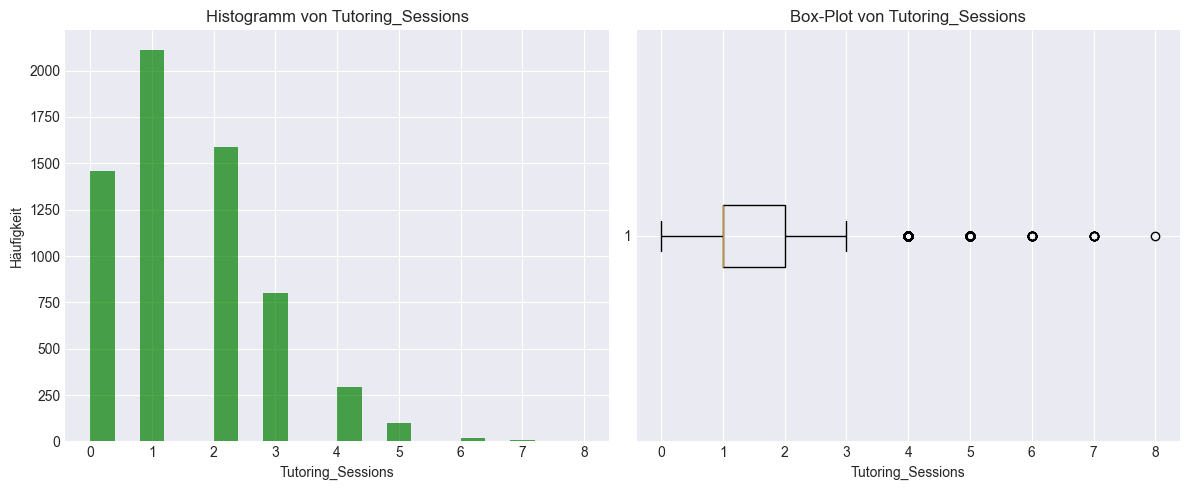

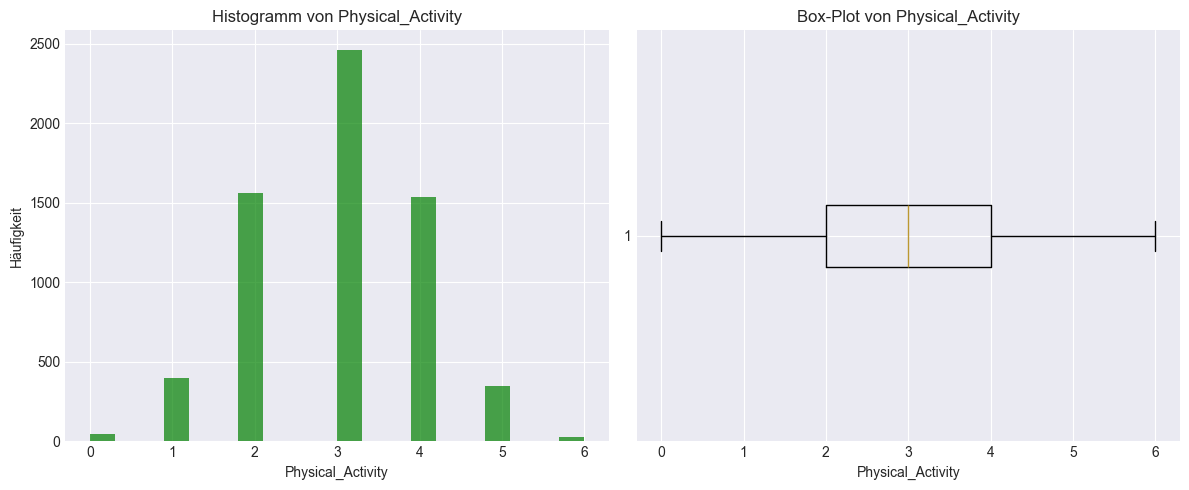

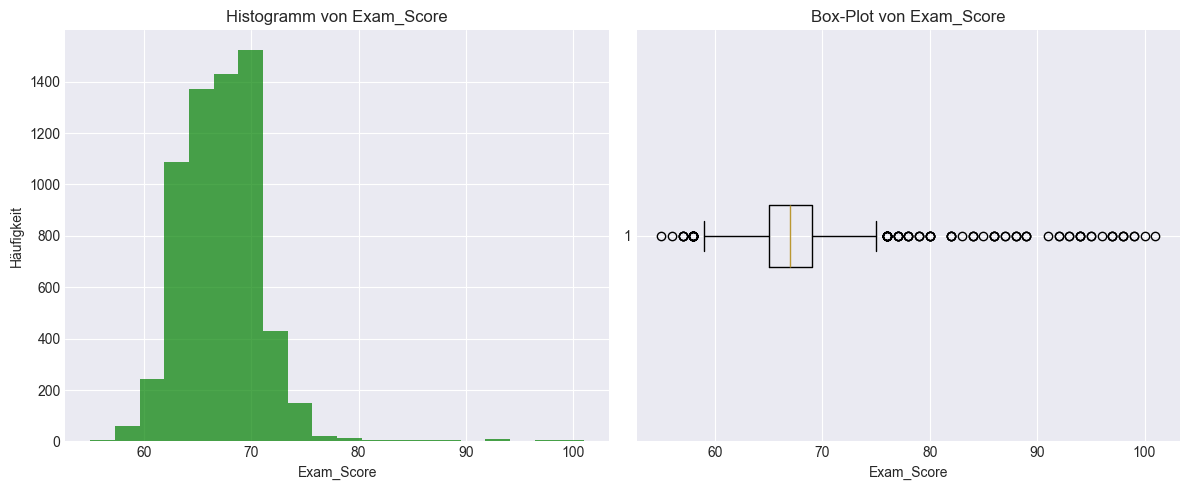

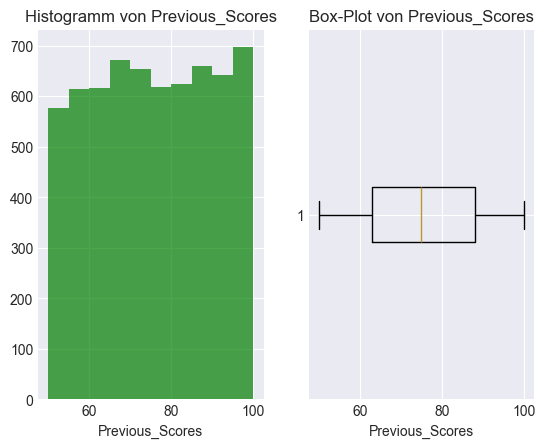

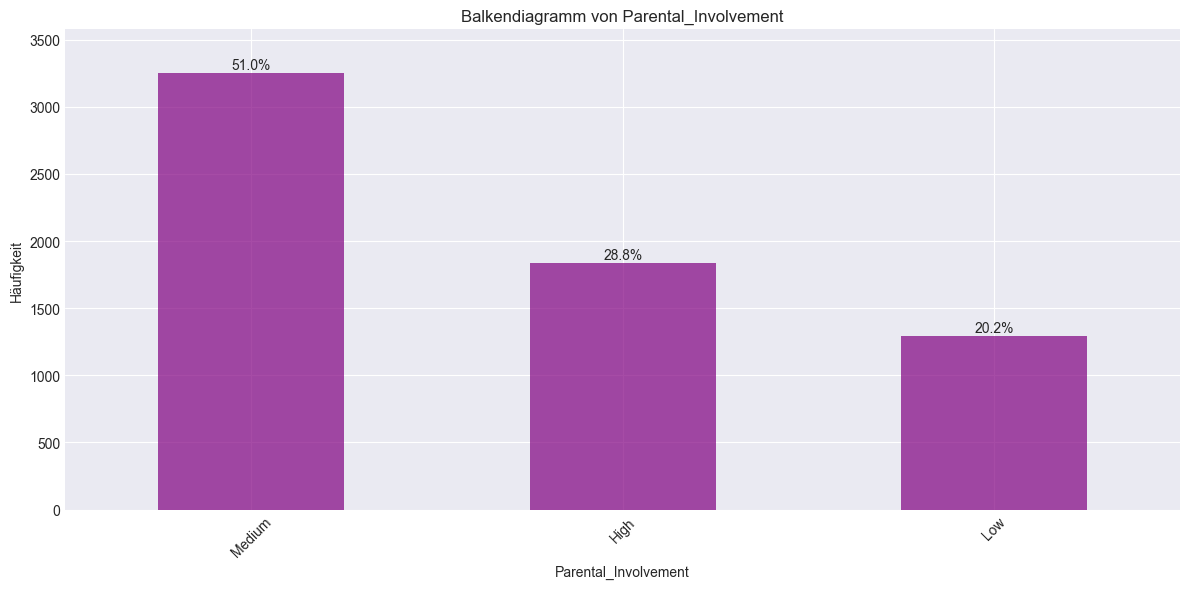

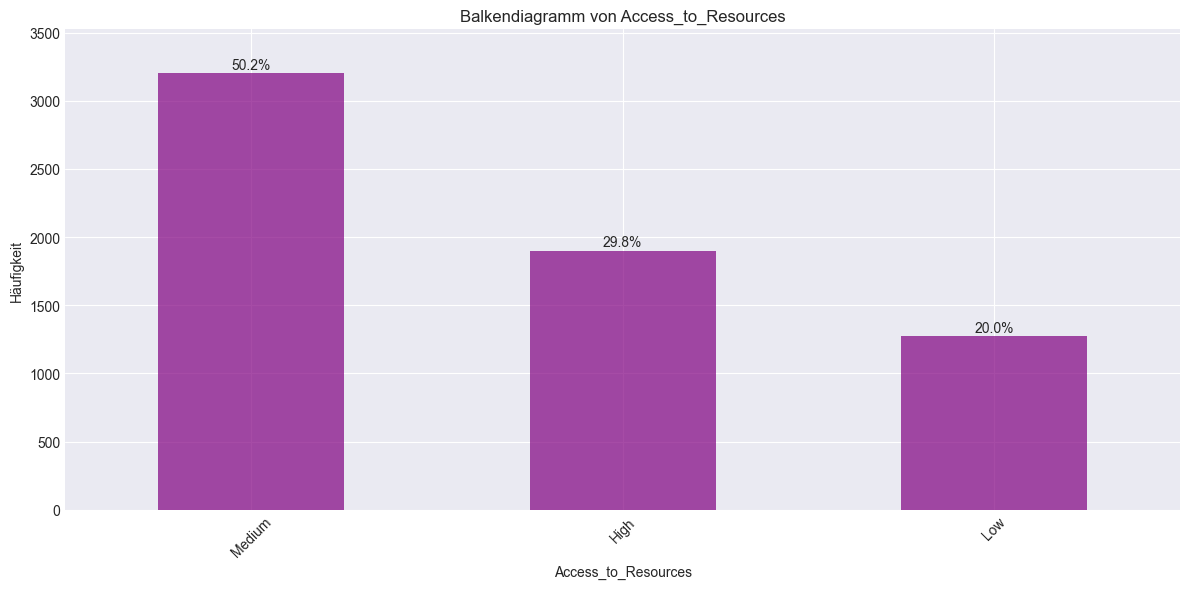

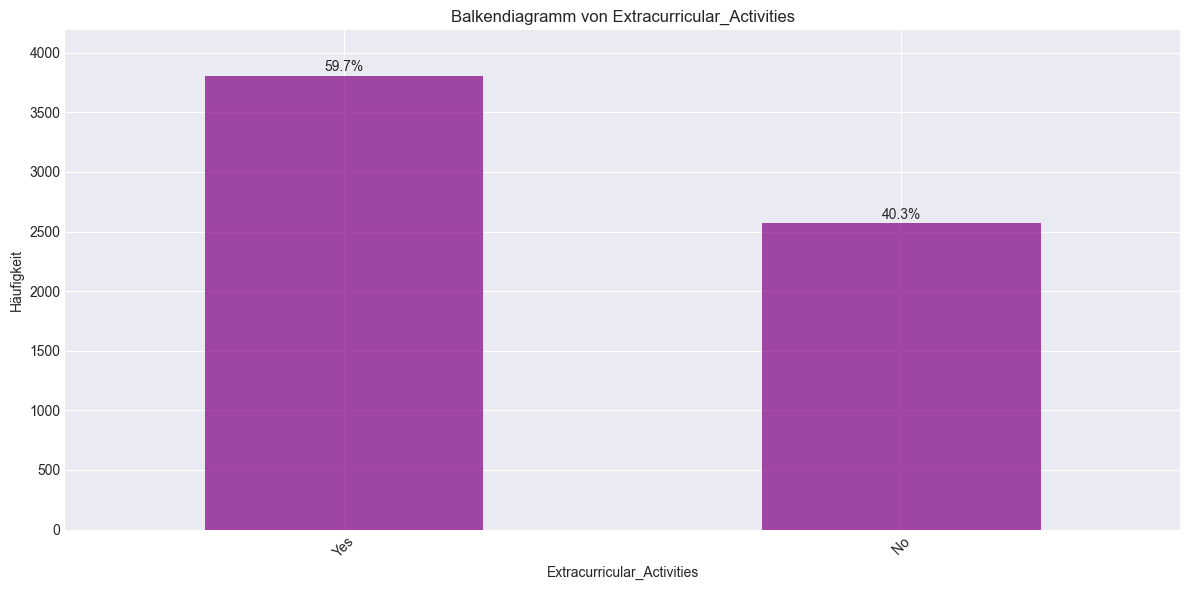

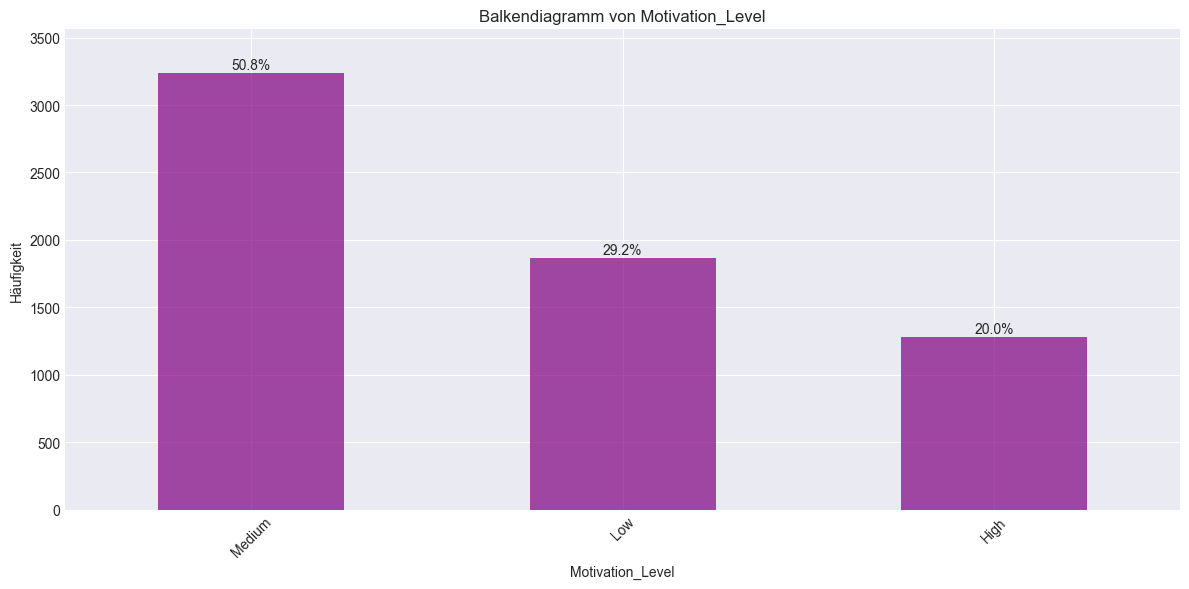

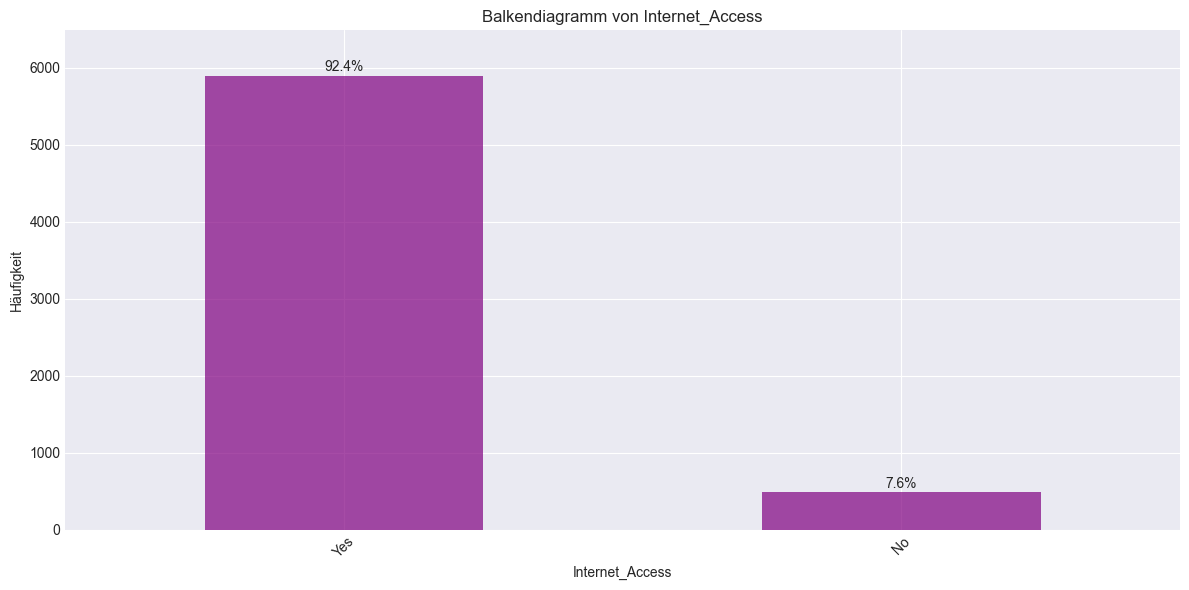

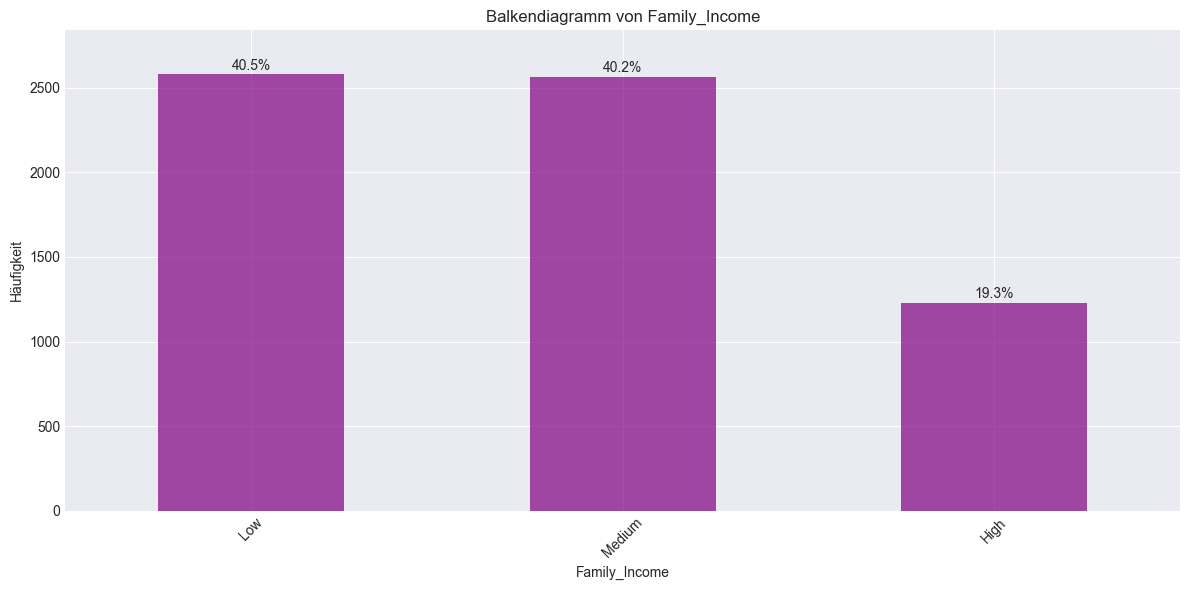

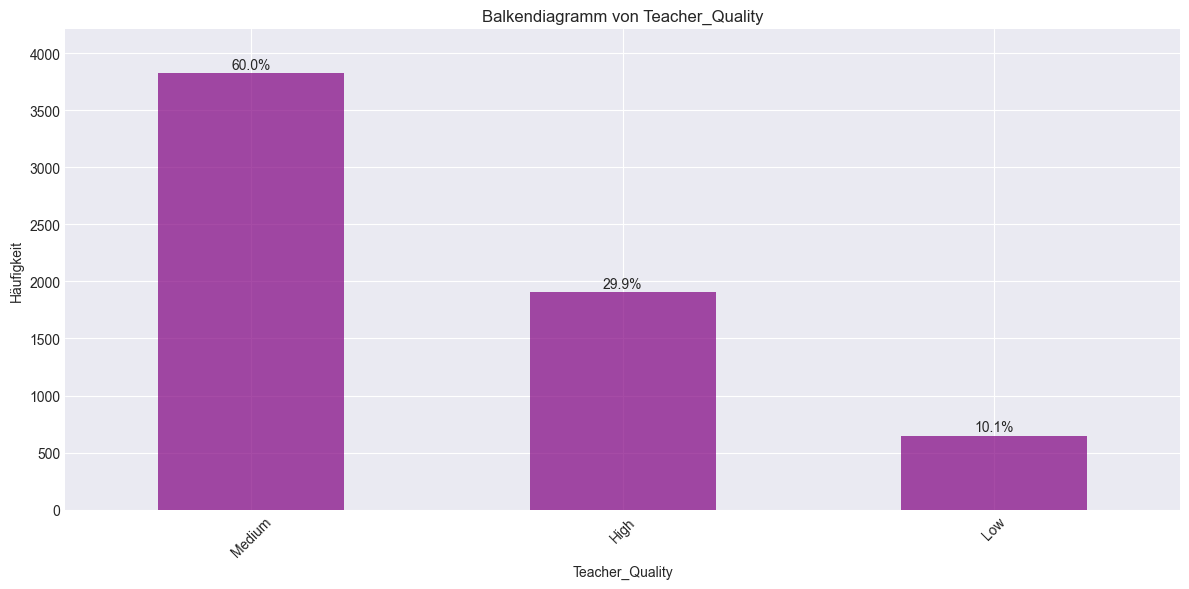

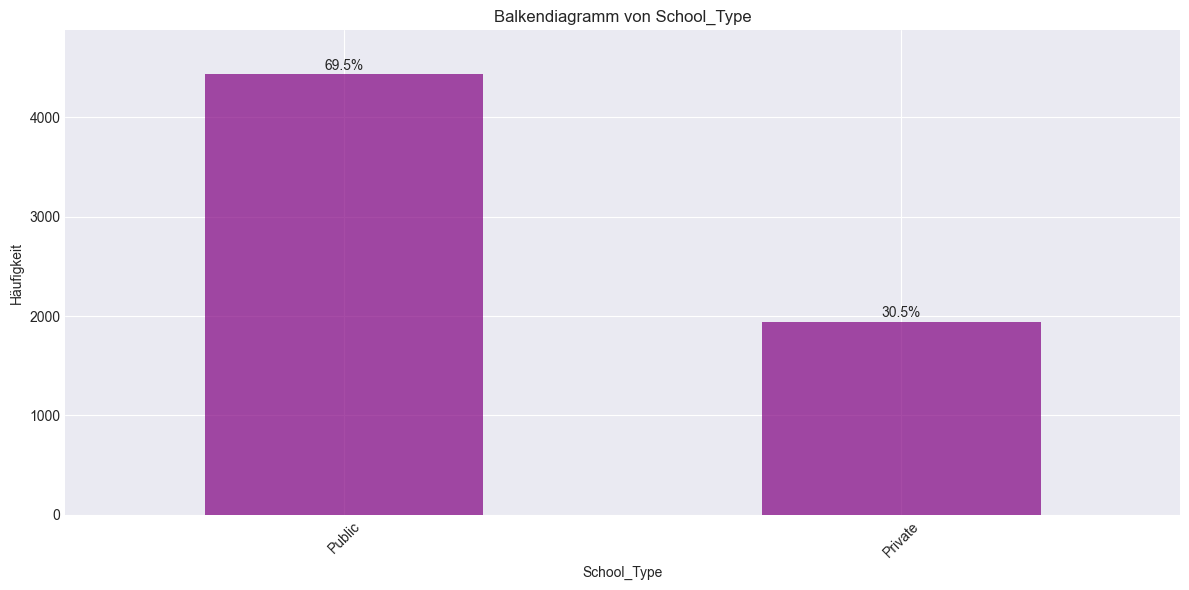

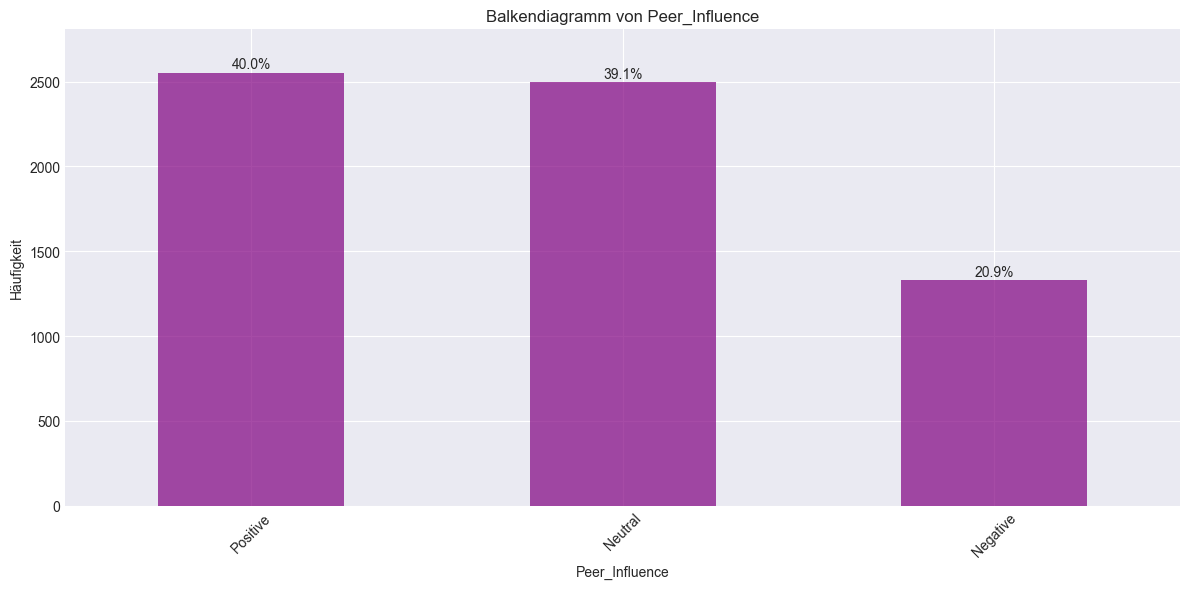

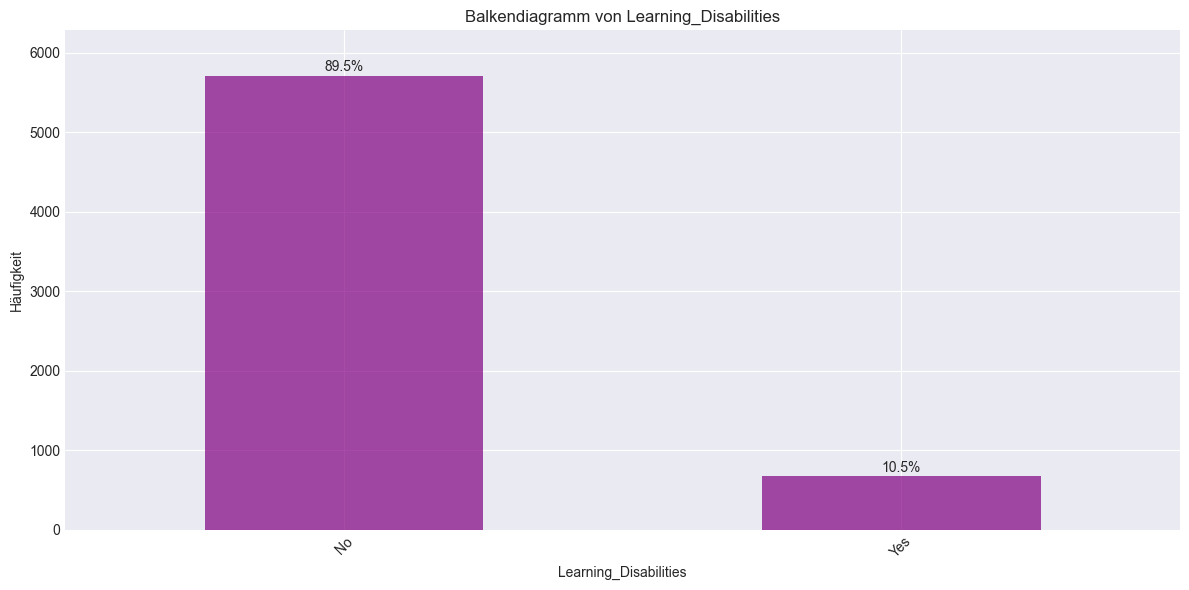

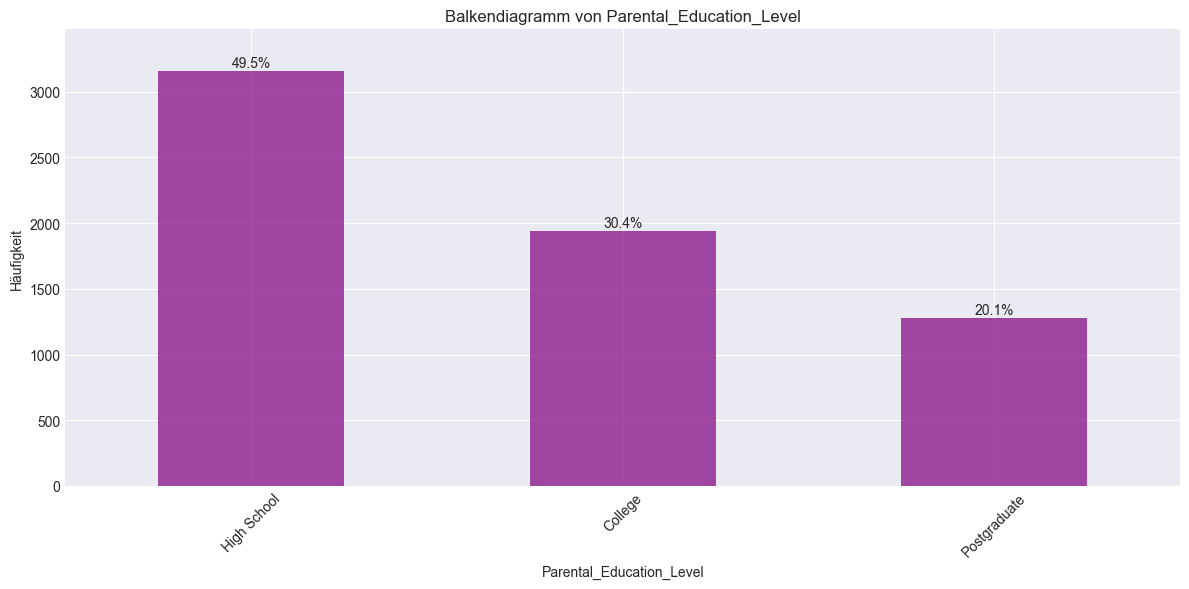

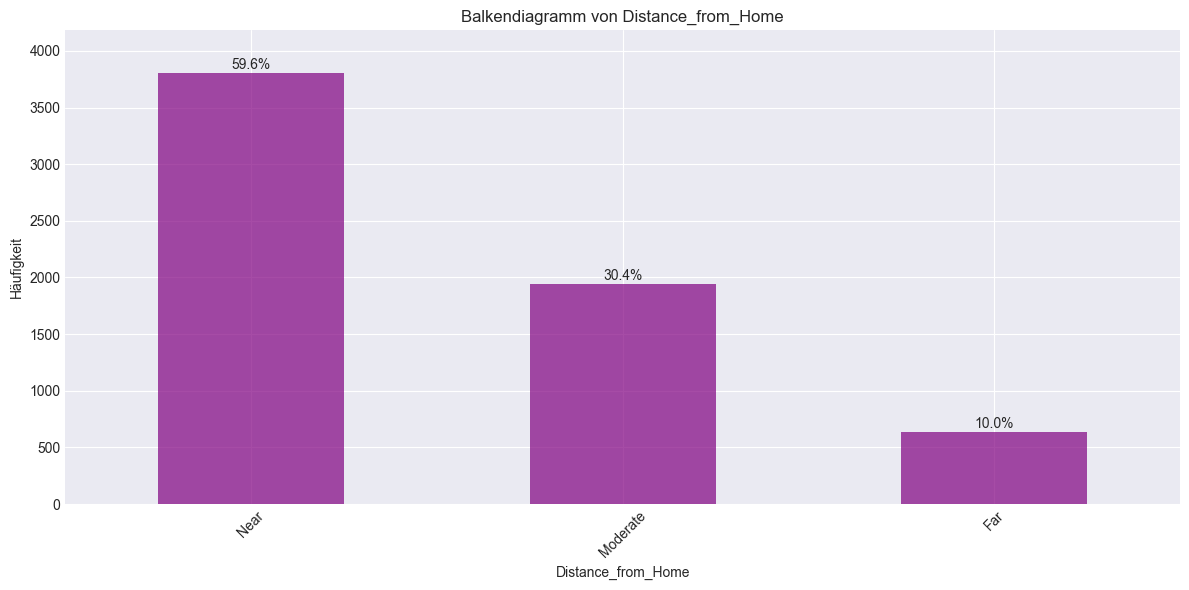

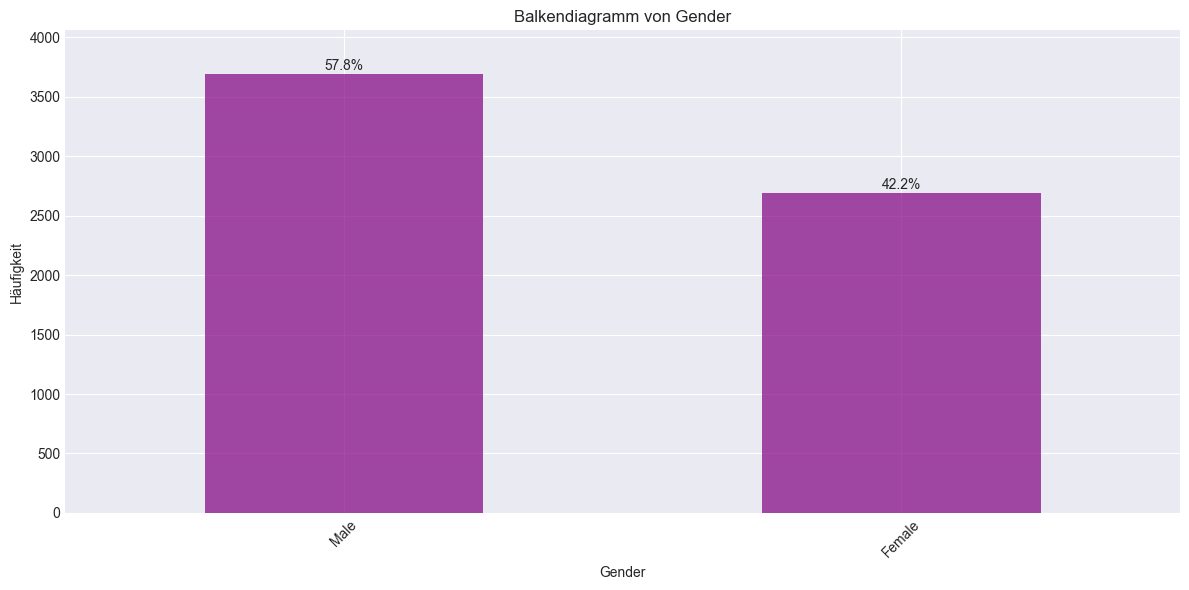

In [20]:
# Verteilung der Zielvariable (Exam_Score) visualisieren
# Histogramm, Box-Plot, etc.
import matplotlib.pyplot as plt

# Histogramm
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Exam_Score'], bins=20, color='blue', alpha=0.7)
plt.title('Histogramm der Exam_Scores')
plt.xlabel('Exam_Score')
plt.ylabel('Häufigkeit')

# Box-Plot
plt.subplot(1, 2, 2)
plt.boxplot(df['Exam_Score'], vert=False)
plt.title('Box-Plot der Exam_Scores')
plt.xlabel('Exam_Score')

plt.tight_layout()
plt.show()

# Verteilung numerischer Features visualisieren
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogramm
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='green', alpha=0.7)
    plt.title(f'Histogramm von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    
    # Box-Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box-Plot von {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

# einzelnes Histogramm von previous scores mit anderer BIN-Grösse

plt.subplot(1, 2, 1)
plt.hist(df['Previous_Scores'], bins=10, color='green', alpha=0.7)
plt.title('Histogramm von Previous_Scores')
plt.xlabel('Previous_Scores')

plt.subplot(1, 2, 2)
plt.boxplot(df['Previous_Scores'], vert=False)
plt.title('Box-Plot von Previous_Scores')
plt.xlabel('Previous_Scores')


# Verteilung kategorischer Features visualisieren (Bar Charts)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    # Daten für den Plot vorbereiten
    counts = df[col].value_counts()
    percentages = (counts / counts.sum()) * 100
    
    # Balkendiagramm erstellen
    ax = counts.plot(kind='bar', color='purple', alpha=0.7)
    
    # Prozentzahlen über den Balken hinzufügen
    for i, value in enumerate(counts):
        ax.text(i, value + (counts.max() * 0.01), f'{percentages[i]:.1f}%', ha='center')

    plt.title(f'Balkendiagramm von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    plt.xticks(rotation=45)
    plt.ylim(0, counts.max() * 1.1) # Y-Achse anpassen, damit der Text Platz hat
    plt.tight_layout()
    plt.show()

### 3.4 Beschreibung wichtiger Features

Hier folgt eine detaillierte Beschreibung einiger wichtiger Features im Datensatz. Die Erkenntnisse basieren auf der ersten Inspektion der Daten in den vorherigen Schritten.

- **`Previous_Scores`**:
  - **Beschreibung:** Die Punktzahl, die der Student in früheren Prüfungen erreicht hat. 
  - **Typ:** Fliesskommazahl (float64)
  - **Wertebereich:** 50 bis 99 Punkte. Es ist stark anzunehmen, dass der Test mit 50 Punkten als bestanden galt, da es darunter keine weiteren Werte mehr gibt und es einige mit knapp 50 Punkten gibt.
  - **Verteilung:** Normalverteilt um einen Mittelwert von ca. 70 Punkten.
  - **Binning:** Im ersten Diagramm mit dem Binning von 20 machte das Balkendiagramm ein Zackenmuster. Mit einem kleineren Binning von 10 verschwindet es wieder. Das liegt an der nicht ganz homogenen Verteilung der Daten und an der zufällig gesetzten Grenze zwischen den Bins.

- **`Exam_Score`** (Zielvariable):
  - **Beschreibung:** Die in der aktuellen Prüfung erreichte Punktzahl. Dies ist die Variable, die wir vorhersagen wollen.
  Es ist stark anzunehmen, dass diese Prüfung mit 55 Punkten als bestanden gilt, da es darunter keine weiteren Werte mehr gibt und doch einige bei knapp 55 Punkten liegen.
  - **Typ:** Fliesskommazahl (float64)
  - **Wertebereich:** 55 bis 101 Punkte.
  - **Verteilung:** Normalverteilt mit einem leichten Schwerpunkt im Bereich von 60-80 Punkten.

### 3.5 Bivariate Analyse

Analyse der Beziehung zwischen Features und der Zielvariable

---

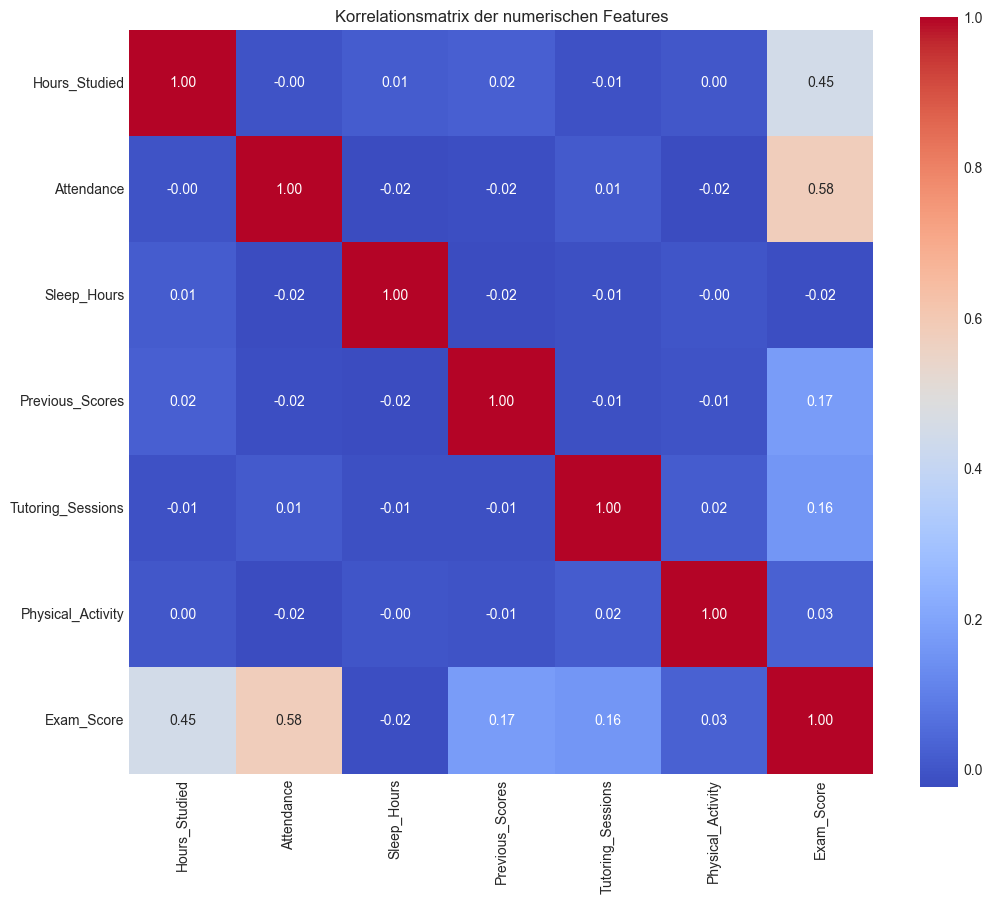


=== Chi2 Scores für kategoriale Features ===
                            chi2_score       p_value
Learning_Disabilities        71.668972  1.008173e-14
Parental_Involvement         26.084300  3.042985e-05
Access_to_Resources          21.236469  2.842493e-04
Peer_Influence               20.343342  4.271865e-04
Distance_from_Home           12.314068  1.516237e-02
Extracurricular_Activities   11.072431  2.576194e-02
Teacher_Quality               8.128561  8.698076e-02
Parental_Education_Level      7.629979  1.061125e-01
Motivation_Level              3.788353  4.354062e-01
Gender                        2.581809  6.300489e-01
Family_Income                 2.098496  7.176487e-01
Internet_Access               1.185810  8.804293e-01
School_Type                   0.570189  9.663180e-01


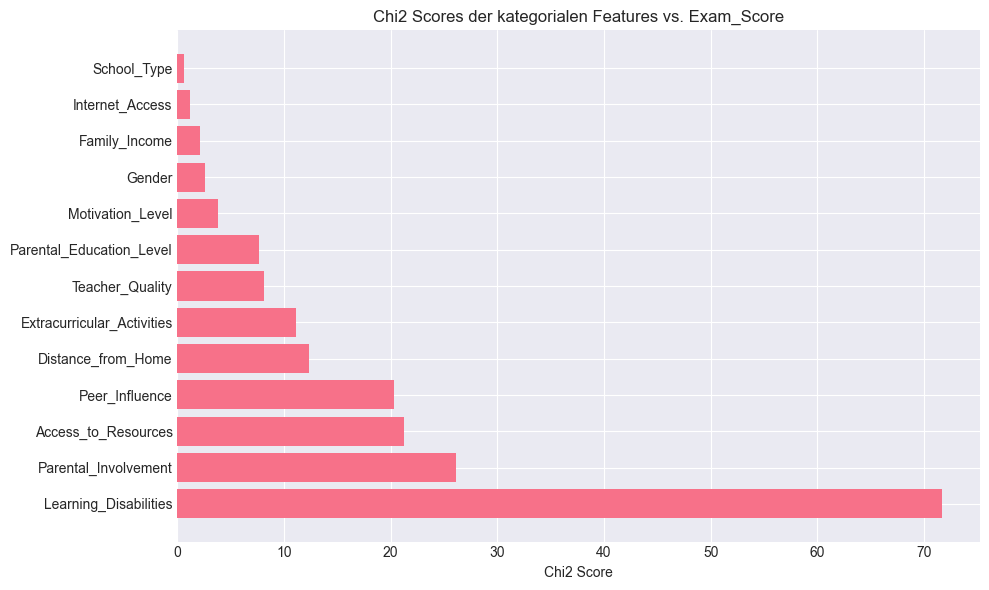

In [21]:
# Korrelationsmatrix für numerische Features erstellen
plt.figure(figsize=(12, 10))
# Nur numerische Spalten für Korrelationsmatrix verwenden
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix der numerischen Features')
plt.show()

# chi2 score für kategoriale Features berechnen
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Kategoriale Features vorbereiten
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Label Encoding für kategoriale Features
chi2_scores = {}
le = LabelEncoder()

for col in categorical_cols:
    # Features encodieren
    X_encoded = le.fit_transform(df[col])
    # Target in Bins umwandeln für chi2 (chi2 benötigt nicht-negative Werte)
    # Wir erstellen Bins für Exam_Score
    y_binned = pd.cut(df['Exam_Score'], bins=5, labels=False)
    
    # Chi2 Score berechnen
    chi2_score, p_value = chi2(X_encoded.reshape(-1, 1), y_binned)
    chi2_scores[col] = {'chi2_score': chi2_score[0], 'p_value': p_value[0]}

# Ergebnisse als DataFrame darstellen
chi2_df = pd.DataFrame(chi2_scores).T.sort_values('chi2_score', ascending=False)
print("\n=== Chi2 Scores für kategoriale Features ===")
print(chi2_df)

# Visualisierung der Chi2 Scores
plt.figure(figsize=(10, 6))
plt.barh(chi2_df.index, chi2_df['chi2_score'])
plt.xlabel('Chi2 Score')
plt.title('Chi2 Scores der kategorialen Features vs. Exam_Score')
plt.tight_layout()
plt.show()


### 3.5.1 Interpretation der Korrelationsmatrix und Chi2-Scores

**Numerische Features (Korrelationsmatrix):**

Die Korrelationsmatrix zeigt folgende wichtige Zusammenhänge mit `Exam_Score`:

1. **Attendance (0.58)** - Stärkste positive Korrelation
   - Höhere Anwesenheit korreliert stark mit besseren Prüfungsergebnissen
   - Dies unterstreicht die Bedeutung der regelmässigen Teilnahme am Unterricht

2. **Hours_Studied (0.45)** - Zweitstärkste Korrelation
   - Mehr Lernzeit führt zu besseren Noten
   - Erwartungsgemäss ein wichtiger Einflussfaktor

3. **Previous_Scores (0.17)** und **Tutoring_Sessions (0.16)** - Moderate Korrelationen
   - Frühere Leistungen und zusätzliche Unterstützung zeigen positive Effekte
   - Der Effekt ist jedoch schwächer als erwartet

4. **Sleep_Hours (-0.02)** und **Physical_Activity (0.03)** - Keine signifikante Korrelation
   - Überraschenderweise zeigen diese Lifestyle-Faktoren kaum Zusammenhang mit der Prüfungsleistung
   - Möglicherweise sind die Unterschiede in der Stichprobe zu gering

**Kategoriale Features (Chi2-Scores):**

Die Chi2-Scores zeigen die statistische Abhängigkeit zwischen kategorialen Features und `Exam_Score` (in Bins):

**Hochsignifikante Features (p < 0.01):**

1. **Learning_Disabilities (71.67, p ≈ 0)** - **Wichtigstes kategoriales Feature**
   - Sehr starker Zusammenhang mit Prüfungsleistung
   - Lernbehinderungen haben einen massiven Einfluss auf die Exam_Score

2. **Parental_Involvement (26.08, p < 0.001)** - **Zweitwichtigstes Feature**
   - Elterliche Unterstützung zeigt starken positiven Effekt
   - Deutlich wichtiger als sozioökonomische Faktoren

3. **Access_to_Resources (21.24, p < 0.001)** - **Drittwichtigstes Feature**
   - Zugang zu Lernmaterialien ist entscheidend für den Erfolg

4. **Peer_Influence (20.34, p < 0.001)**
   - Der Einfluss von Mitschülern spielt eine wichtige Rolle

**Signifikante Features (p < 0.05):**

5. **Distance_from_Home (12.31, p = 0.015)**
   - Entfernung zur Schule hat einen messbaren Effekt
   
6. **Extracurricular_Activities (11.07, p = 0.026)**
   - Ausserschulische Aktivitäten zeigen einen Zusammenhang

**Nicht signifikante Features (p > 0.05):**

- **Teacher_Quality (8.13, p = 0.087)** - Grenzwertig
- **Parental_Education_Level (7.63, p = 0.106)** - Überraschend schwach
- **Motivation_Level (3.79, p = 0.435)** - Kein signifikanter Zusammenhang
- **Gender (2.58, p = 0.630)** - Keine geschlechtsspezifischen Unterschiede
- **Family_Income (2.10, p = 0.718)** - Sozioökonomischer Status zeigt keinen klaren Effekt
- **Internet_Access (1.19, p = 0.880)** - Nahezu keine Bedeutung
- **School_Type (0.57, p = 0.966)** - Kein Unterschied zwischen Schultypen

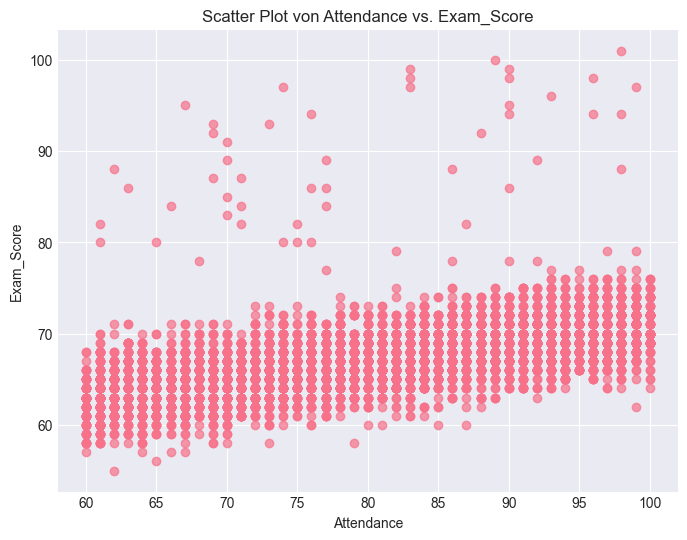

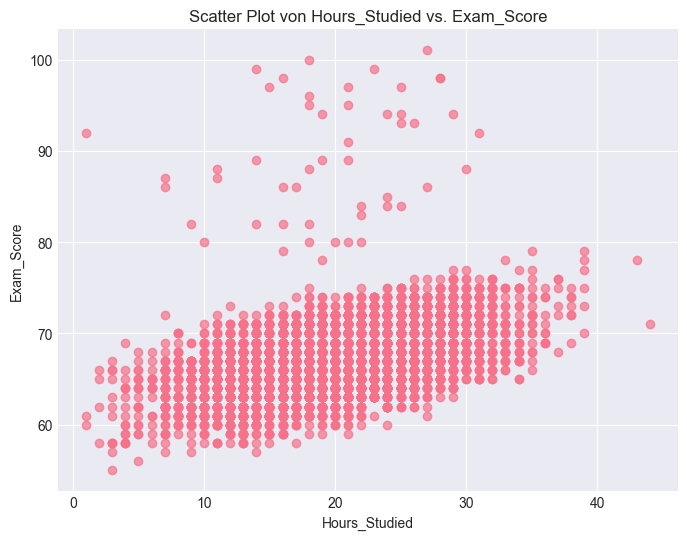

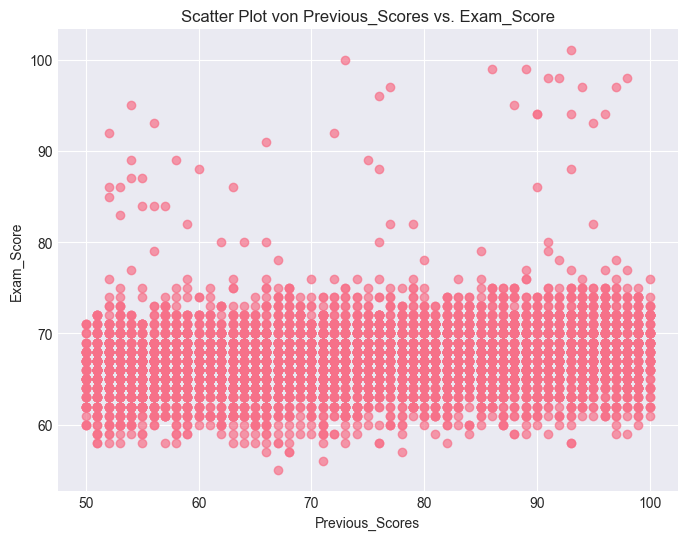

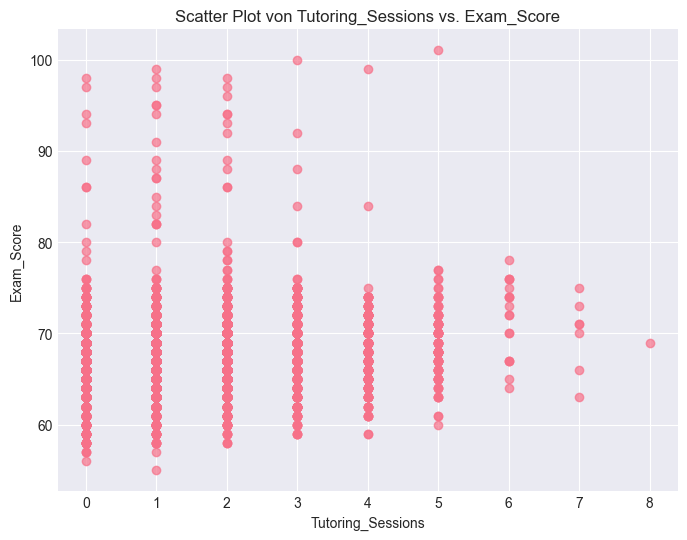

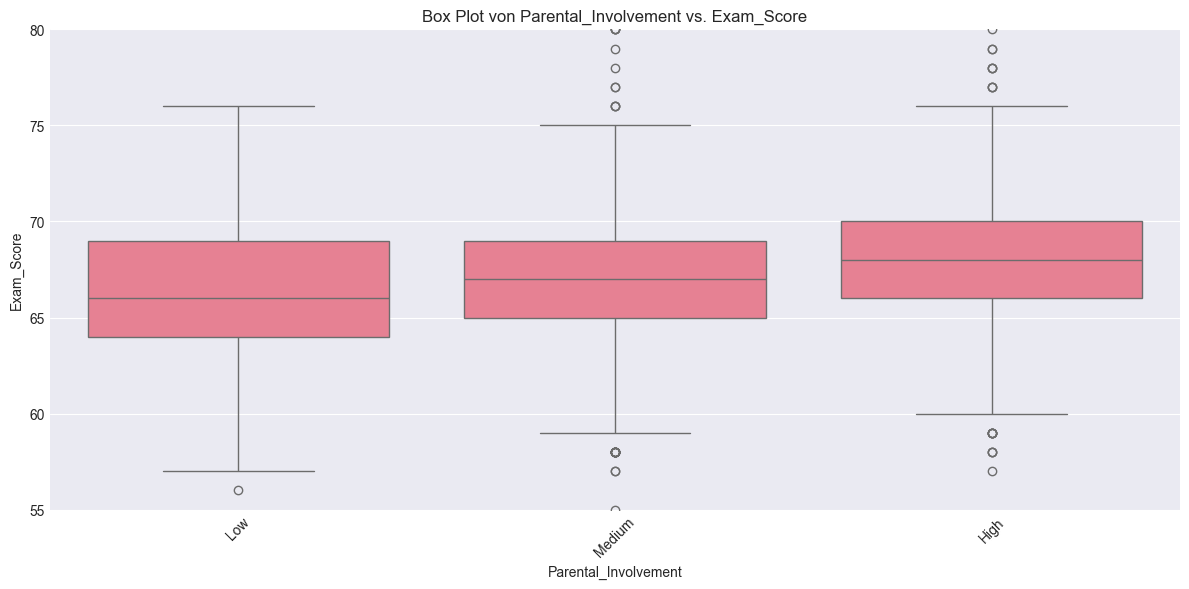

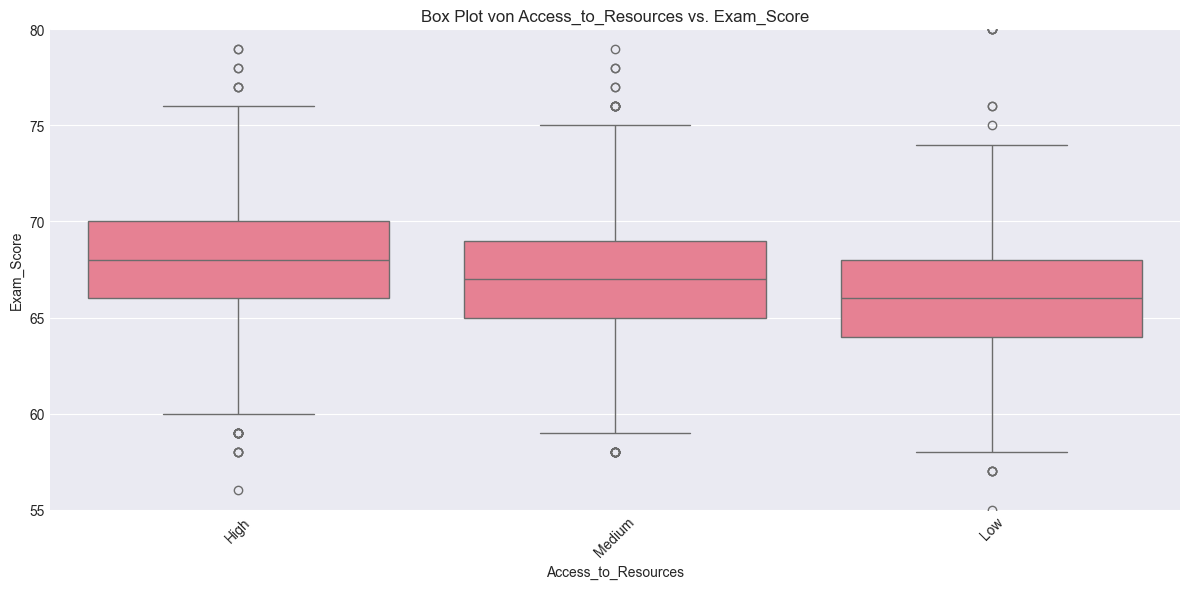

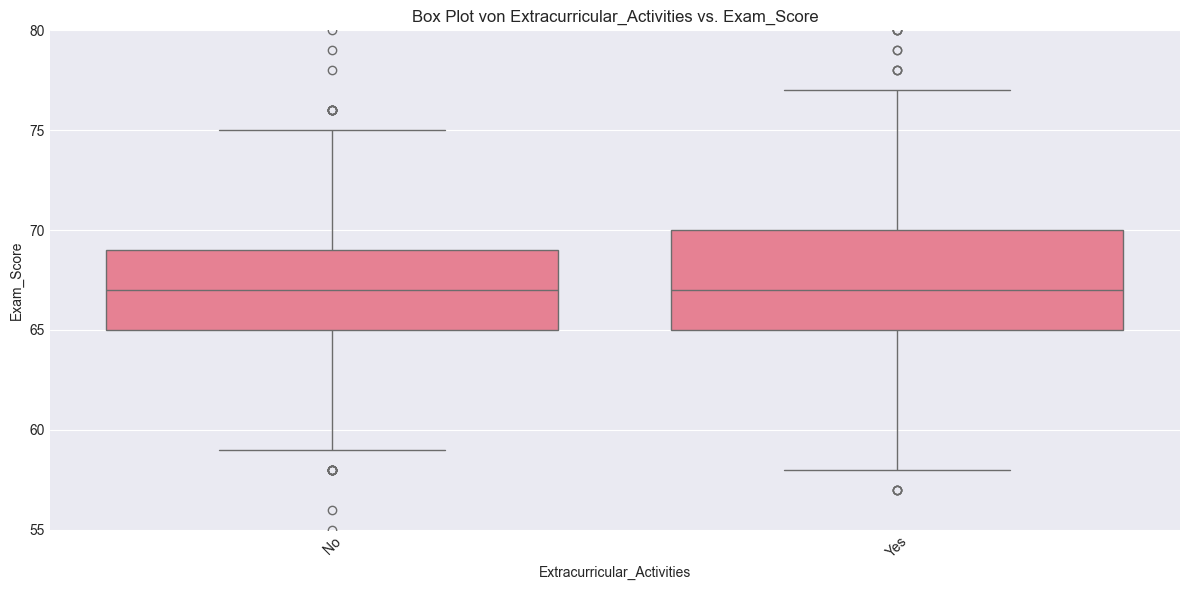

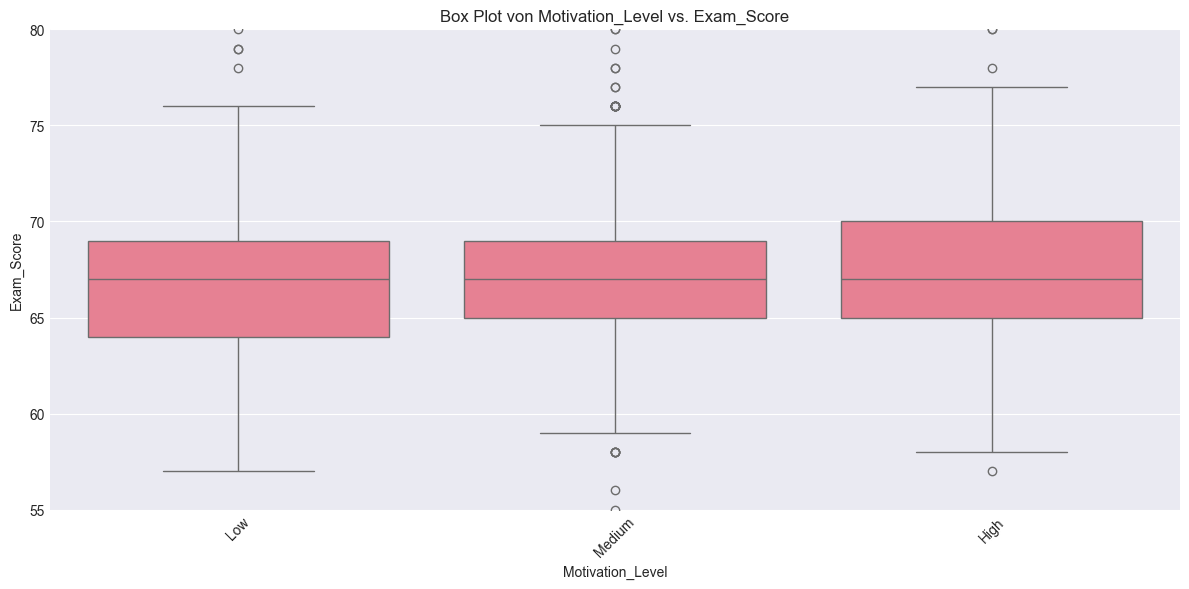

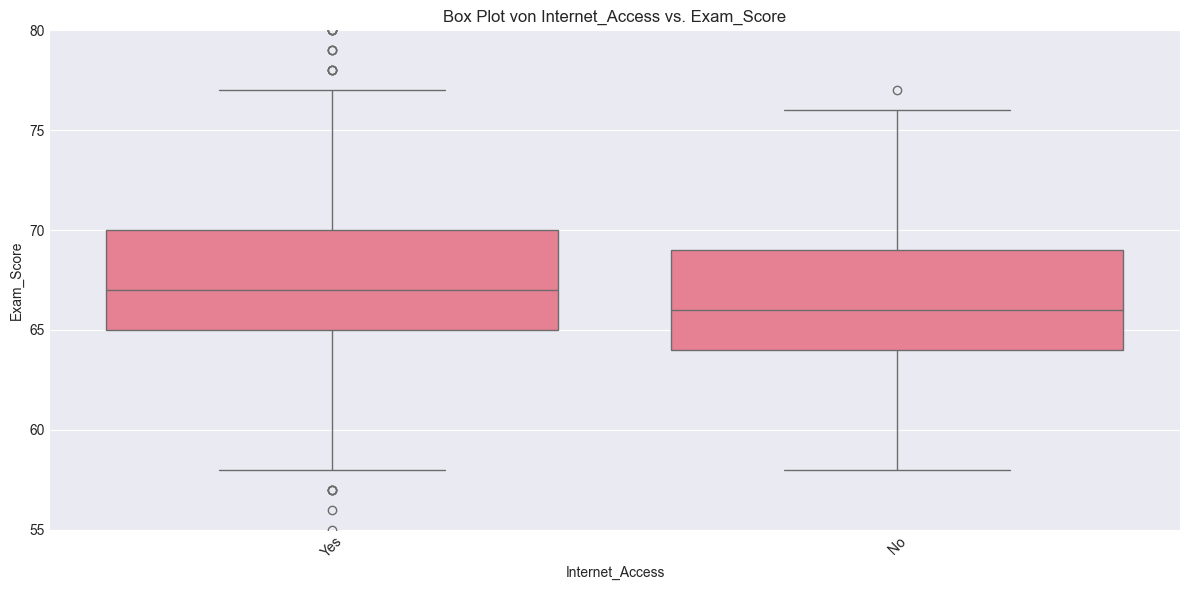

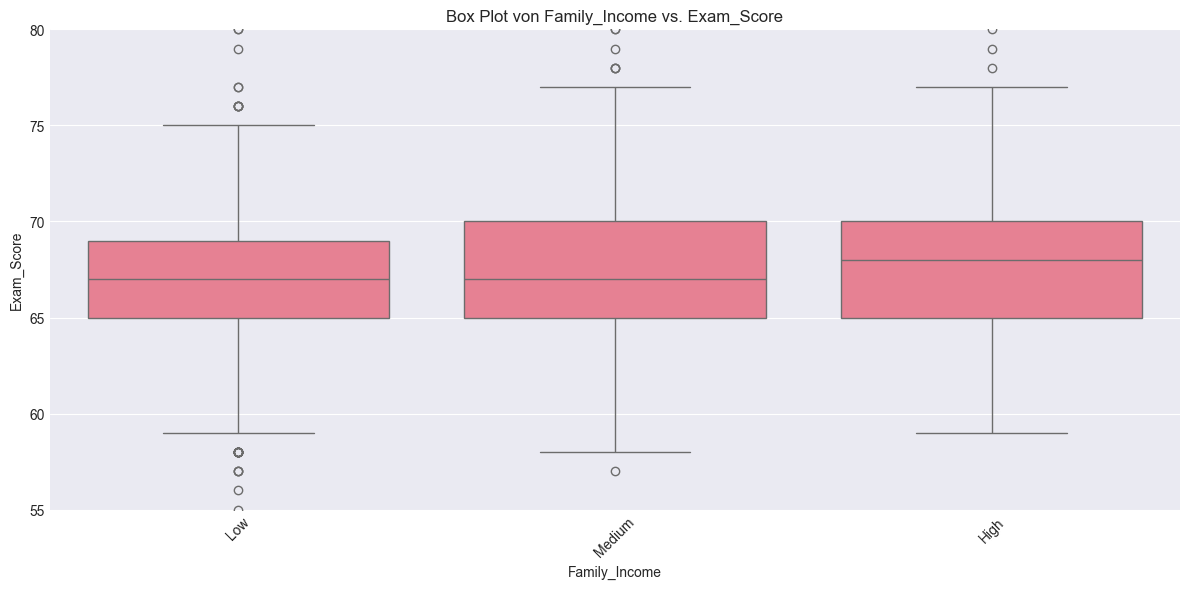

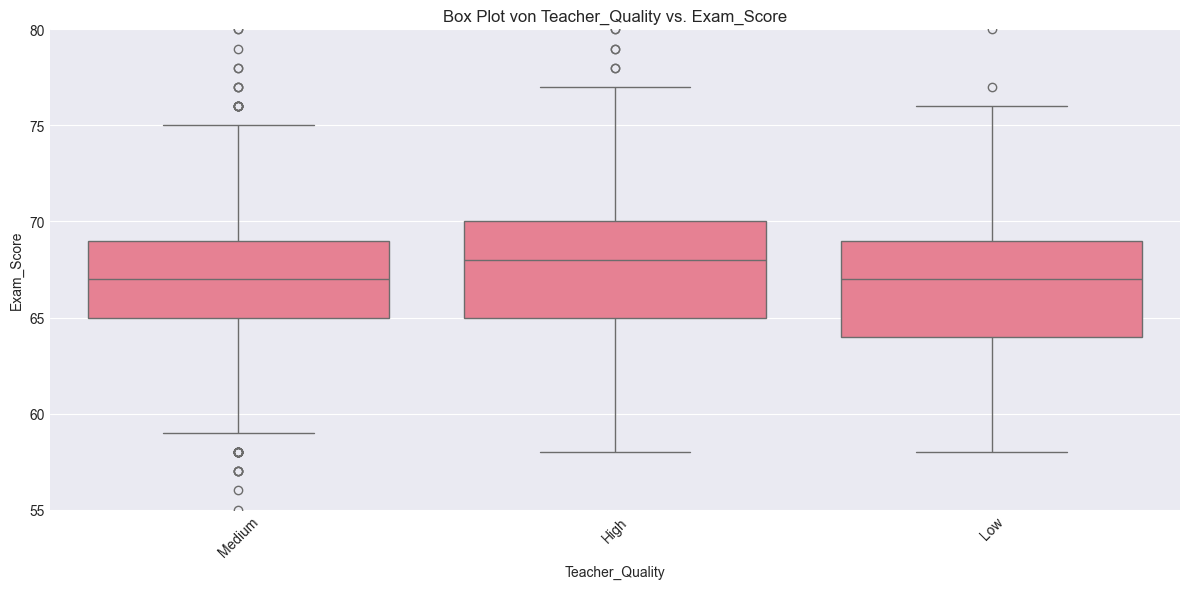

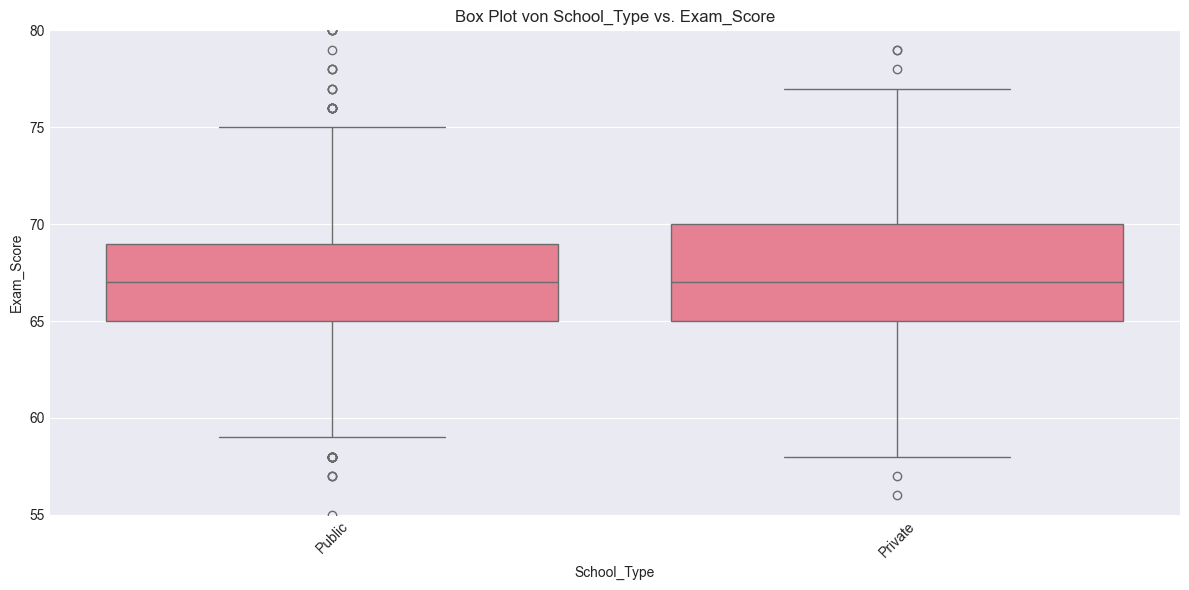

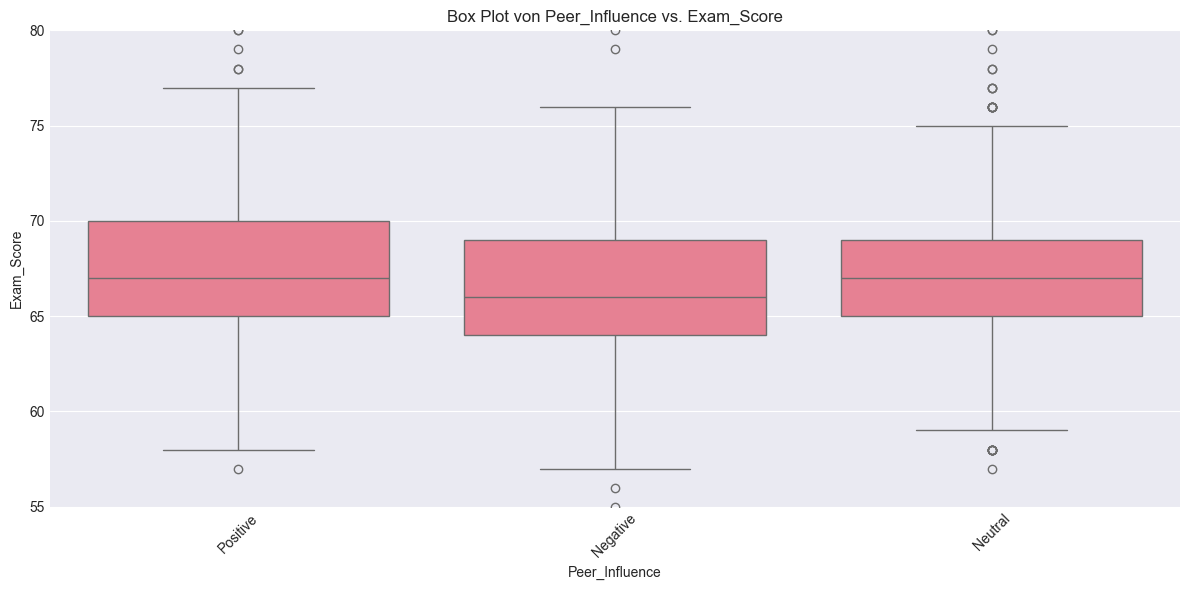

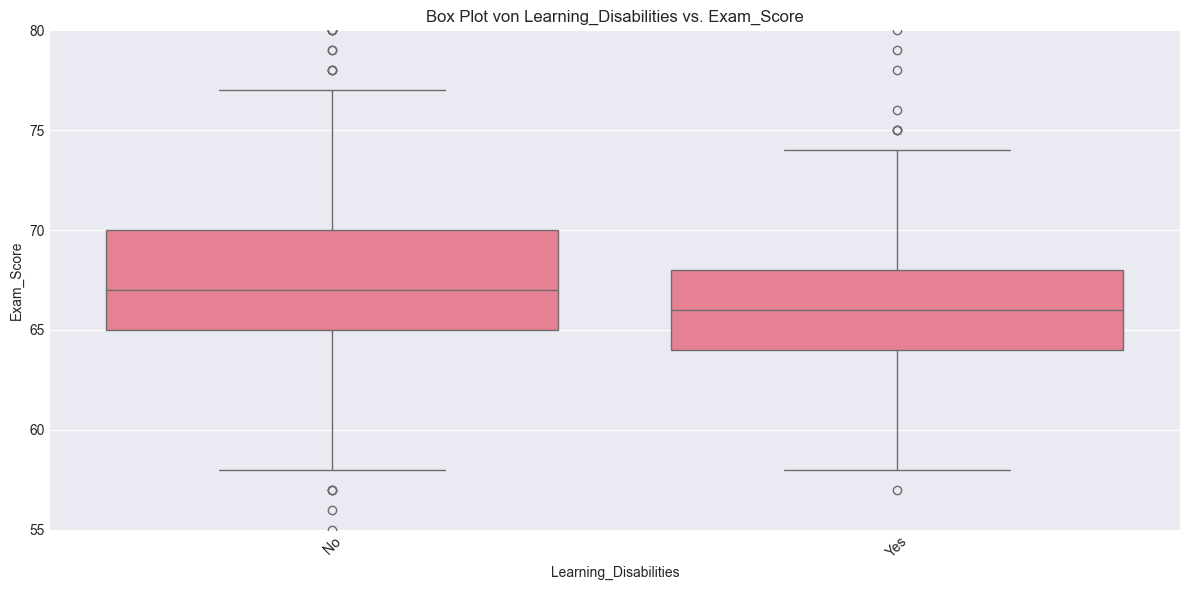

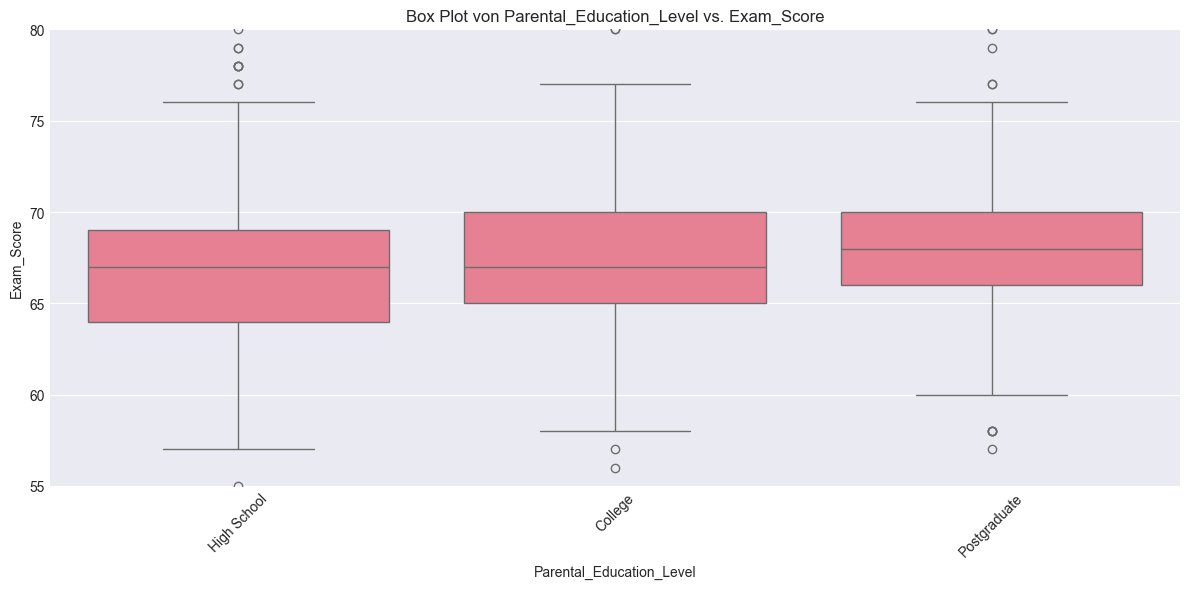

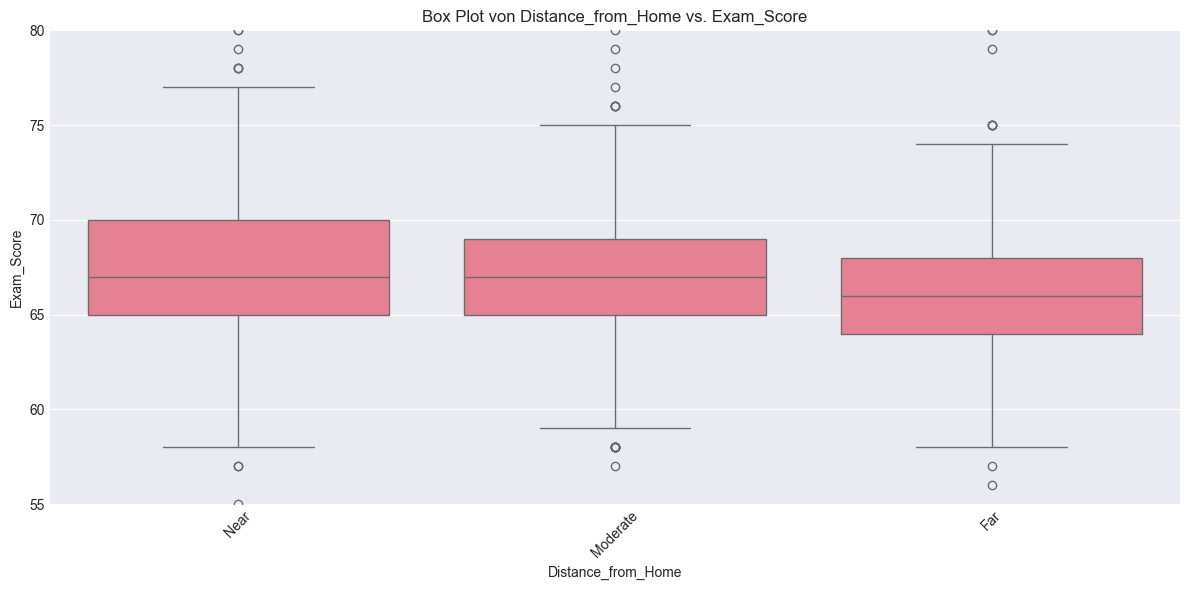

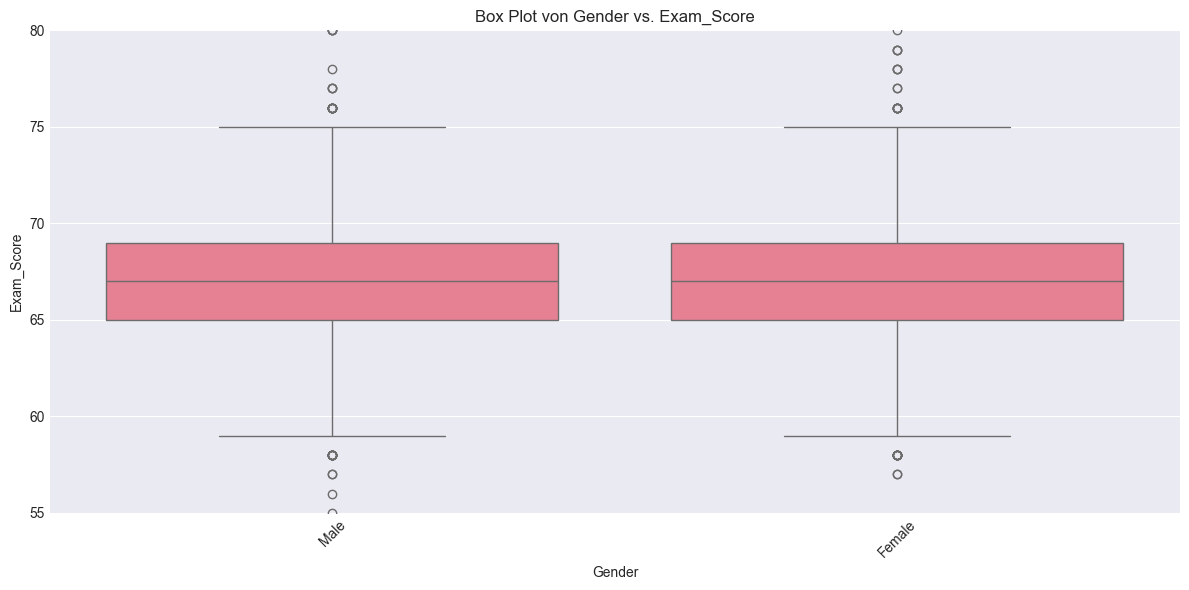

In [22]:
# Scatter Plots für wichtigste numerische Features vs. Exam_Score
important_features = correlation_matrix['Exam_Score'].abs().nlargest(5).index
for col in important_features:
    if col != 'Exam_Score':
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], df['Exam_Score'], alpha=0.7)
        plt.title(f'Scatter Plot von {col} vs. Exam_Score')
        plt.xlabel(col)
        plt.ylabel('Exam_Score')
        plt.show()

# box Plots für kategorische Features vs. Exam_Score
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols: 
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Exam_Score', data=df)
    plt.title(f'Box Plot von {col} vs. Exam_Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.ylim(55, 80)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 3.6 Wichtigste Erkenntnisse aus der EDA

**Zusammenfassung der EDA-Ergebnisse:**

---

**Wichtigste Erkenntnisse:**

1. **Verhaltensfaktoren dominieren**: Attendance und Hours_Studied sind die wichtigsten numerischen Prädiktoren
2. **Lernbehinderungen sind der kritischste Faktor**: Mit Abstand höchster Chi2-Score
3. **Soziale Unterstützung ist wichtiger als Einkommen**: Parental_Involvement und Access_to_Resources schlagen Family_Income deutlich
4. **Überraschungen**: 
   - Motivation_Level zeigt keinen signifikanten Effekt 
   - Parental_Education_Level ist weniger wichtig als erwartet
   - Sleep_Hours und Physical_Activity haben praktisch keinen Einfluss
5. **Strukturelle Faktoren sind weniger wichtig**: School_Type und Internet_Access spielen kaum eine Rolle

**Implikationen für die Modellierung:**
- Fokus auf Attendance, Hours_Studied, Learning_Disabilities, Parental_Involvement und Access_to_Resources


6. **Folgende Features haben wir ausgewählt um sie in unserem Modell zu berücksichtigen:**

   **Numerische Features (4):**
   - `Hours_Studied` - Zweitwichtigster numerischer Prädiktor (Korrelation: 0.45)
   - `Attendance` - Wichtigster numerischer Prädiktor (Korrelation: 0.58)
   - `Previous_Scores` - Moderate Korrelation (0.17)
   - `Tutoring_Sessions` - Moderate Korrelation (0.16)

   **Kategoriale Features (6):**
   - `Learning_Disabilities` - Höchster Chi2-Score (71.67, p ≈ 0)
   - `Parental_Involvement` - Sehr signifikant (26.08, p < 0.001)
   - `Access_to_Resources` - Sehr signifikant (21.24, p < 0.001)
   - `Peer_Influence` - Sehr signifikant (20.34, p < 0.001)
   - `Distance_from_Home` - Signifikant (12.31, p = 0.015)
   - `Extracurricular_Activities` - Signifikant (11.07, p = 0.026)

   **Total: 10 Features** (von ursprünglich 20 Features im Datensatz)

   **Ausgeschlossene Features (10):**
   - `Sleep_Hours` - Keine Korrelation (-0.02)
   - `Physical_Activity` - Keine Korrelation (0.03)
   - `Teacher_Quality` - Nicht signifikant (p = 0.087)
   - `Parental_Education_Level` - Nicht signifikant (p = 0.106)
   - `Motivation_Level` - Nicht signifikant (p = 0.435)
   - `Gender` - Nicht signifikant (p = 0.630)
   - `Family_Income` - Nicht signifikant (p = 0.718)
   - `Internet_Access` - Nicht signifikant (p = 0.880)
   - `School_Type` - Nicht signifikant (p = 0.966)
   - `Exam_Score` - Zielvariable (wird separat behandelt)

   **Begründung der Auswahl:**
   - Alle ausgewählten Features zeigen entweder eine substantielle Korrelation (|r| > 0.15) oder statistische Signifikanz (p < 0.05)
   - Ausgeschlossene Features zeigen keine statistisch nachweisbare Beziehung zur Zielvariable
   - Diese Reduktion von 20 auf 10 Features verbessert die Modellinterpretierbarkeit und reduziert Overfitting-Risiko


## 4. Data Preprocessing und Feature Engineering

---

In [23]:
# ============================================================
# AUTOMATISCHER VERGLEICH: Original vs. Log-Transformation
# ============================================================
# Beide Varianten werden automatisch durchlaufen

# Dictionary für alle Ergebnisse
all_results = {}

# Features & target
X = df.drop(columns=["Exam_Score"])
y_original = df["Exam_Score"]

print("=" * 80)
print("AUTOMATISCHER VERGLEICH: ORIGINAL vs. LOG-TRANSFORMATION")
print("=" * 80)

# Beide Varianten durchlaufen
for variant_name, use_log in [("Original", False), ("Log", True)]:
    print(f"\n{'='*80}")
    print(f"VARIANTE: {variant_name.upper()}")
    print(f"{'='*80}")
    
    # Target vorbereiten
    if use_log:
        y = np.log(y_original)
        print("🔄 Log-Transformation aktiviert!")
    else:
        y = y_original
        print("📊 Keine Log-Transformation (Original-Skala)")
    
    # Ergebnisse für diese Variante speichern
    all_results[variant_name] = {
        'y': y,
        'y_original': y_original,
        'use_log': use_log
    }

print("\n" + "="*80)
print("✅ Konfiguration abgeschlossen - beide Varianten bereit!")
print("="*80)


AUTOMATISCHER VERGLEICH: ORIGINAL vs. LOG-TRANSFORMATION

VARIANTE: ORIGINAL
📊 Keine Log-Transformation (Original-Skala)

VARIANTE: LOG
🔄 Log-Transformation aktiviert!

✅ Konfiguration abgeschlossen - beide Varianten bereit!


In [24]:
from sklearn.preprocessing import OrdinalEncoder

# selected features (use the ones you chose in the EDA)
numerical_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

# Ordinale Features MIT definierter Reihenfolge (haben natürliche Ordnung)
ordinal_features = ['Parental_Involvement', 'Access_to_Resources', 'Peer_Influence', 'Distance_from_Home']

# Reihenfolge für jeden ordinalen Feature (von niedrig nach hoch)
ordinal_categories = [
    ['Low', 'Medium', 'High'],           # Parental_Involvement
    ['Low', 'Medium', 'High'],           # Access_to_Resources
    ['Negative', 'Neutral', 'Positive'], # Peer_Influence
    ['Near', 'Moderate', 'Far']          # Distance_from_Home
]

# Nominale Features (keine Ordnung) - werden One-Hot encoded
nominal_features = ['Learning_Disabilities', 'Extracurricular_Activities']

# Alle Features für Fit/Predict
all_features = numerical_features + ordinal_features + nominal_features

# ------------------------------------------------------------
# Transformer für jeden Feature-Typ
# ------------------------------------------------------------

# Numerische Features: Imputer + Scaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Ordinale Features: Imputer + OrdinalEncoder (mit definierter Reihenfolge)
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(
        categories=ordinal_categories,
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

# Nominale Features: Imputer + OneHotEncoder
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(
        drop='if_binary',        # Bei binären Features nur 1 Spalte
        handle_unknown='ignore',
        sparse_output=False
    ))
])

# ------------------------------------------------------------
# ColumnTransformer kombiniert alles
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='drop'
)

## 5. Modellvergleich (No Free Lunch)

### 5.1 Linear Regression

In [25]:


print("=" * 80)
print("LINEAR REGRESSION - Vergleich Original vs. Log")
print("=" * 80)

# Beide Varianten durchlaufen
for variant_name in ["Original", "Log"]:
    print(f"\n{'='*80}")
    print(f"VARIANTE: {variant_name.upper()}")
    print(f"{'='*80}")
    
    # Daten für diese Variante
    y = all_results[variant_name]['y']
    use_log = all_results[variant_name]['use_log']
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Pipeline erstellen
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    
    # Training
    pipeline.fit(X_train[all_features], y_train)
    
    # Vorhersagen
    y_train_pred = pipeline.predict(X_train[all_features])
    y_test_pred = pipeline.predict(X_test[all_features])
    
    # Metriken berechnen
    if use_log:
        # Im Log-Raum
        r2_train_log = r2_score(y_train, y_train_pred)
        r2_test_log = r2_score(y_test, y_test_pred)
        
        # Zurück-transformieren für Original-Skala
        y_train_orig = np.exp(y_train)
        y_test_orig = np.exp(y_test)
        y_train_pred_orig = np.exp(y_train_pred)
        y_test_pred_orig = np.exp(y_test_pred)
        
        r2_train = r2_score(y_train_orig, y_train_pred_orig)
        r2_test = r2_score(y_test_orig, y_test_pred_orig)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
        
        print(f"Train R² (Log-Raum): {r2_train_log:.4f}")
        print(f"Test R² (Log-Raum): {r2_test_log:.4f}")
        print(f"Train R² (Original-Skala): {r2_train:.4f}")
        print(f"Test R² (Original-Skala): {r2_test:.4f}")
    else:
        # Direkt auf Original-Skala
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        print(f"Train R²: {r2_train:.4f}")
        print(f"Test R²: {r2_test:.4f}")
    
    print(f"Train RMSE (Original-Skala): {rmse_train:.4f}")
    print(f"Test RMSE (Original-Skala): {rmse_test:.4f}")
    
    # Kreuzvalidierung
    cv_scores = cross_val_score(pipeline, X_train[all_features], y_train, cv=5, scoring='r2')
    print(f"\nKreuzvalidierung (5-Fold):")
    print(f"CV R² Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    
    # Ergebnisse speichern
    all_results[variant_name]['linear'] = {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std()
    }

# Vergleich
print("\n" + "="*80)
print("VERGLEICH: ORIGINAL vs. LOG")
print("="*80)
comparison_df = pd.DataFrame({
    'Metrik': ['Test R²', 'Test RMSE', 'CV R² Mean'],
    'Original': [
        f"{all_results['Original']['linear']['r2_test']:.4f}",
        f"{all_results['Original']['linear']['rmse_test']:.4f}",
        f"{all_results['Original']['linear']['cv_r2_mean']:.4f}"
    ],
    'Log': [
        f"{all_results['Log']['linear']['r2_test']:.4f}",
        f"{all_results['Log']['linear']['rmse_test']:.4f}",
        f"{all_results['Log']['linear']['cv_r2_mean']:.4f}"
    ]
})
print(comparison_df.to_string(index=False))

# Dimensionen nur einmal anzeigen
print(f"\n=== Dimensionsvergleich ===")
print(f"Input Features: {len(all_features)} Spalten")
X_transformed = preprocessor.fit_transform(X_train[all_features])
print(f"Nach Preprocessing: {X_transformed.shape[1]} Spalten")
print(f"  - Numerisch: {len(numerical_features)} Spalten")
print(f"  - Ordinal: {len(ordinal_features)} Spalten (statt {len(ordinal_features)*3} bei One-Hot)")
print(f"  - Nominal: {len(nominal_features)} Spalten (binär, drop='if_binary')")


LINEAR REGRESSION - Vergleich Original vs. Log

VARIANTE: ORIGINAL
Train R²: 0.6745
Test R²: 0.7031
Train RMSE (Original-Skala): 2.2288
Test RMSE (Original-Skala): 2.1478

Kreuzvalidierung (5-Fold):
CV R² Mean: 0.6774 (+/- 0.0984)

VARIANTE: LOG
Train R² (Log-Raum): 0.7264
Test R² (Log-Raum): 0.7525
Train R² (Original-Skala): 0.6744
Test R² (Original-Skala): 0.7032
Train RMSE (Original-Skala): 2.2293
Test RMSE (Original-Skala): 2.1476

Kreuzvalidierung (5-Fold):
CV R² Mean: 0.7273 (+/- 0.0813)

VERGLEICH: ORIGINAL vs. LOG
    Metrik Original    Log
   Test R²   0.7031 0.7032
 Test RMSE   2.1478 2.1476
CV R² Mean   0.6774 0.7273

=== Dimensionsvergleich ===
Input Features: 10 Spalten
Nach Preprocessing: 10 Spalten
  - Numerisch: 4 Spalten
  - Ordinal: 4 Spalten (statt 12 bei One-Hot)
  - Nominal: 2 Spalten (binär, drop='if_binary')


### 5.2 Polynomial Regression

POLYNOMIAL REGRESSION (degree=2) - Vergleich Original vs. Log

VARIANTE: ORIGINAL
Train R²: 0.6752
Test R²: 0.7027
Train RMSE (Original-Skala): 2.2267
Test RMSE (Original-Skala): 2.1494

Kreuzvalidierung (5-Fold):
CV R² Mean: 0.6764 (+/- 0.0993)

VARIANTE: LOG
Train R² (Log-Raum): 0.7270
Test R² (Log-Raum): 0.7521
Train R² (Original-Skala): 0.6750
Test R² (Original-Skala): 0.7028
Train RMSE (Original-Skala): 2.2273
Test RMSE (Original-Skala): 2.1490

Kreuzvalidierung (5-Fold):
CV R² Mean: 0.7266 (+/- 0.0824)

VERGLEICH: ORIGINAL vs. LOG
    Metrik Original    Log
   Test R²   0.7027 0.7028
 Test RMSE   2.1494 2.1490
CV R² Mean   0.6764 0.7266

DIAGNOSTIC PLOTS (Original-Variante)


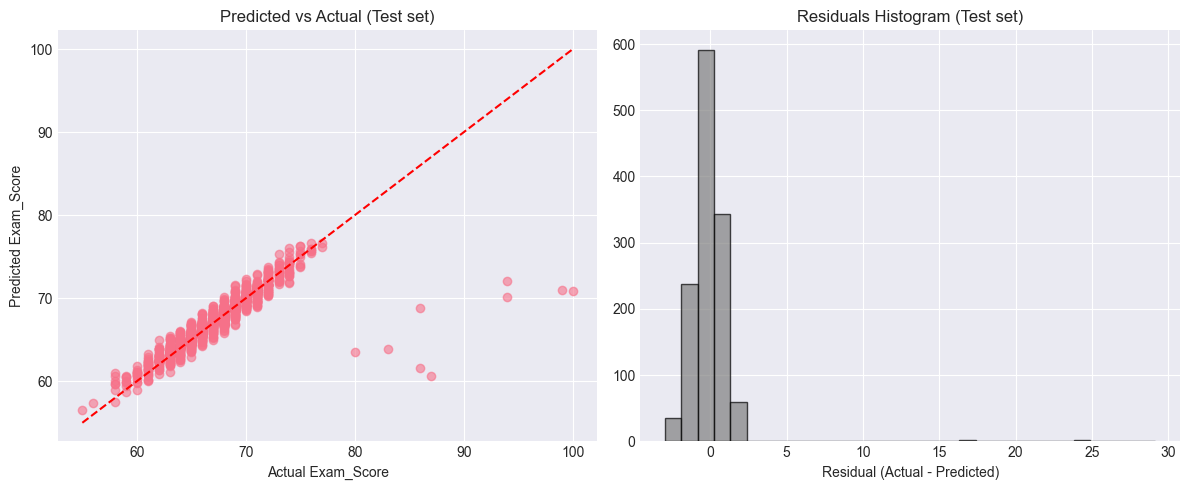

In [26]:
print("=" * 80)
print("POLYNOMIAL REGRESSION (degree=2) - Vergleich Original vs. Log")
print("=" * 80)

# Beide Varianten durchlaufen
for variant_name in ["Original", "Log"]:
    print(f"\n{'='*80}")
    print(f"VARIANTE: {variant_name.upper()}")
    print(f"{'='*80}")
    
    # Daten für diese Variante
    y = all_results[variant_name]['y']
    use_log = all_results[variant_name]['use_log']
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessor mit Polynomial Features
    numeric_transformer_poly = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ])
    
    preprocessor_poly = ColumnTransformer(transformers=[
        ('num', numeric_transformer_poly, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])
    
    # Pipeline
    pipeline_poly = Pipeline(steps=[
        ('preprocessor', preprocessor_poly),
        ('regressor', LinearRegression())
    ])
    
    # Training
    pipeline_poly.fit(X_train[all_features], y_train)
    
    # Vorhersagen
    y_train_pred = pipeline_poly.predict(X_train[all_features])
    y_test_pred = pipeline_poly.predict(X_test[all_features])
    
    # Metriken berechnen
    if use_log:
        # Im Log-Raum
        r2_train_log = r2_score(y_train, y_train_pred)
        r2_test_log = r2_score(y_test, y_test_pred)
        
        # Zurück-transformieren für Original-Skala
        y_train_orig = np.exp(y_train)
        y_test_orig = np.exp(y_test)
        y_train_pred_orig = np.exp(y_train_pred)
        y_test_pred_orig = np.exp(y_test_pred)
        
        r2_train = r2_score(y_train_orig, y_train_pred_orig)
        r2_test = r2_score(y_test_orig, y_test_pred_orig)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
        
        print(f"Train R² (Log-Raum): {r2_train_log:.4f}")
        print(f"Test R² (Log-Raum): {r2_test_log:.4f}")
        print(f"Train R² (Original-Skala): {r2_train:.4f}")
        print(f"Test R² (Original-Skala): {r2_test:.4f}")
    else:
        # Direkt auf Original-Skala
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        print(f"Train R²: {r2_train:.4f}")
        print(f"Test R²: {r2_test:.4f}")
    
    print(f"Train RMSE (Original-Skala): {rmse_train:.4f}")
    print(f"Test RMSE (Original-Skala): {rmse_test:.4f}")
    
    # Kreuzvalidierung
    cv_scores = cross_val_score(pipeline_poly, X_train[all_features], y_train, cv=5, scoring='r2')
    print(f"\nKreuzvalidierung (5-Fold):")
    print(f"CV R² Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    
    # Ergebnisse speichern
    all_results[variant_name]['polynomial'] = {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'y_test_pred': y_test_pred if not use_log else y_test_pred_orig,
        'y_test': y_test if not use_log else y_test_orig
    }

# Vergleich
print("\n" + "="*80)
print("VERGLEICH: ORIGINAL vs. LOG")
print("="*80)
comparison_df = pd.DataFrame({
    'Metrik': ['Test R²', 'Test RMSE', 'CV R² Mean'],
    'Original': [
        f"{all_results['Original']['polynomial']['r2_test']:.4f}",
        f"{all_results['Original']['polynomial']['rmse_test']:.4f}",
        f"{all_results['Original']['polynomial']['cv_r2_mean']:.4f}"
    ],
    'Log': [
        f"{all_results['Log']['polynomial']['r2_test']:.4f}",
        f"{all_results['Log']['polynomial']['rmse_test']:.4f}",
        f"{all_results['Log']['polynomial']['cv_r2_mean']:.4f}"
    ]
})
print(comparison_df.to_string(index=False))

# Diagnostic plots nur für Original-Variante
print("\n" + "="*80)
print("DIAGNOSTIC PLOTS (Original-Variante)")
print("="*80)

y_test_plot = all_results['Original']['polynomial']['y_test']
y_test_pred_plot = all_results['Original']['polynomial']['y_test_pred']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test_plot, y_test_pred_plot, alpha=0.6)
lims = [min(y_test_plot.min(), y_test_pred_plot.min()),
        max(y_test_plot.max(), y_test_pred_plot.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel('Actual Exam_Score')
plt.ylabel('Predicted Exam_Score')
plt.title('Predicted vs Actual (Test set)')

plt.subplot(1,2,2)
residuals = y_test_plot - y_test_pred_plot
plt.hist(residuals, bins=30, color='gray', edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram (Test set)')
plt.xlabel('Residual (Actual - Predicted)')

plt.tight_layout()
plt.show()


   degree  r2_train   r2_test  rmse_train  rmse_test
0       1  0.726441  0.752537    0.029352   0.028263
1       2  0.727028  0.752091    0.029321   0.028288
2       3  0.728551  0.751131    0.029239   0.028343
3       4  0.730480  0.748544    0.029135   0.028490


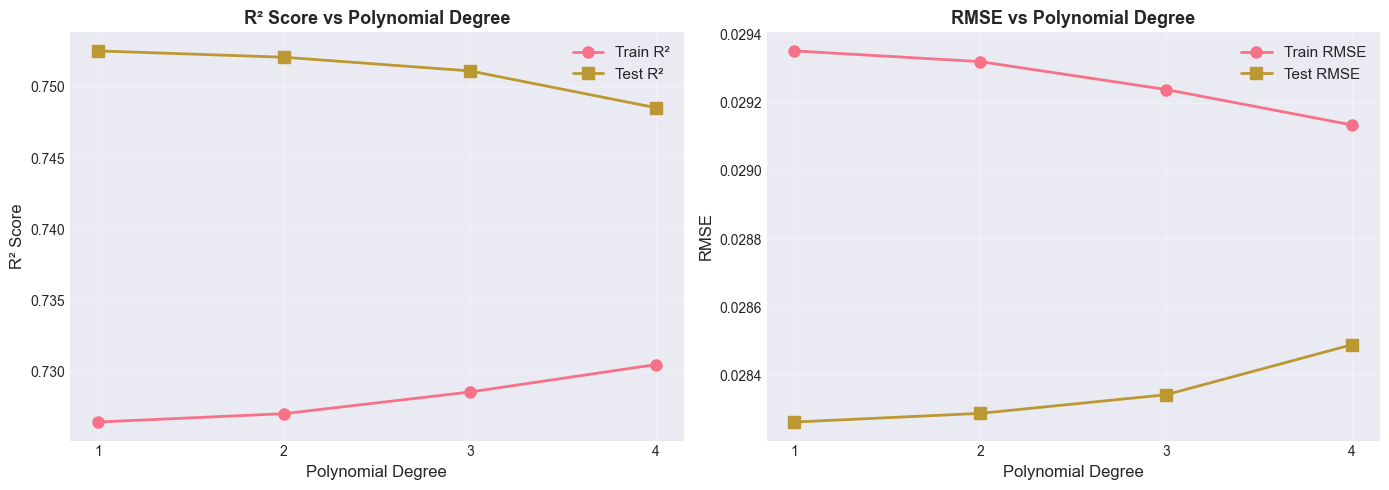

In [27]:
#Polynomial Regression - Verschiedene Grade testen

# Polynomial Regression mit verschiedenen Graden testen
degrees = range(1, 5)
results = {'degree': [], 'r2_train': [], 'r2_test': [], 'rmse_train': [], 'rmse_test': []}

for degree in degrees:
    # Build numeric pipeline with polynomial features
    numeric_transformer_temp = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False))
    ])
    
    preprocessor_temp = ColumnTransformer(transformers=[
        ('num', numeric_transformer_temp, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])
    
    pipeline_temp = Pipeline(steps=[
        ('preprocessor', preprocessor_temp),
        ('regressor', LinearRegression())
    ])
    
    # Fit and predict mit all_features
    pipeline_temp.fit(X_train[all_features], y_train)
    y_train_pred_temp = pipeline_temp.predict(X_train[all_features])
    y_test_pred_temp = pipeline_temp.predict(X_test[all_features])
    
    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred_temp)
    r2_test = r2_score(y_test, y_test_pred_temp)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_temp))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_temp))
    
    results['degree'].append(degree)
    results['r2_train'].append(r2_train)
    results['r2_test'].append(r2_test)
    results['rmse_train'].append(rmse_train)
    results['rmse_test'].append(rmse_test)

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score Plot
axes[0].plot(results_df['degree'], results_df['r2_train'], 'o-', label='Train R²', linewidth=2, markersize=8)
axes[0].plot(results_df['degree'], results_df['r2_test'], 's-', label='Test R²', linewidth=2, markersize=8)
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score vs Polynomial Degree', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(degrees)

# RMSE Plot
axes[1].plot(results_df['degree'], results_df['rmse_train'], 'o-', label='Train RMSE', linewidth=2, markersize=8)
axes[1].plot(results_df['degree'], results_df['rmse_test'], 's-', label='Test RMSE', linewidth=2, markersize=8)
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('RMSE vs Polynomial Degree', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

plt.tight_layout()
plt.show()

POLYNOMIAL REGRESSION (degree=1) - Exam Scores < 80
Vergleich Original vs. Log-Transformation

📊 Datensatz nach Filterung (Exam_Score < 80):
   Anzahl Samples: 6330 (von 6378 original)
   Prozent behalten: 99.2%

VARIANTE: ORIGINAL (Filtered < 80)
📊 Keine Log-Transformation (Original-Skala)

Train R²: 0.9304
Test R²: 0.9211
Train RMSE (Original-Skala): 0.8869
Test RMSE (Original-Skala): 0.9408

Kreuzvalidierung (5-Fold):
CV R² Mean: 0.9301 (+/- 0.0202)

VARIANTE: LOG (Filtered < 80)
🔄 Log-Transformation aktiviert!

Train R² (Log-Raum): 0.9297
Test R² (Log-Raum): 0.9205
Train R² (Original-Skala): 0.9293
Test R² (Original-Skala): 0.9199
Train RMSE (Original-Skala): 0.8940
Test RMSE (Original-Skala): 0.9485

Kreuzvalidierung (5-Fold):
CV R² Mean: 0.9293 (+/- 0.0187)

VERGLEICH: ORIGINAL vs. LOG (Filtered < 80)
    Metrik Original    Log
   Test R²   0.9211 0.9199
 Test RMSE   0.9408 0.9485
CV R² Mean   0.9301 0.9293

DIAGNOSTIC PLOTS - Vergleich beider Varianten


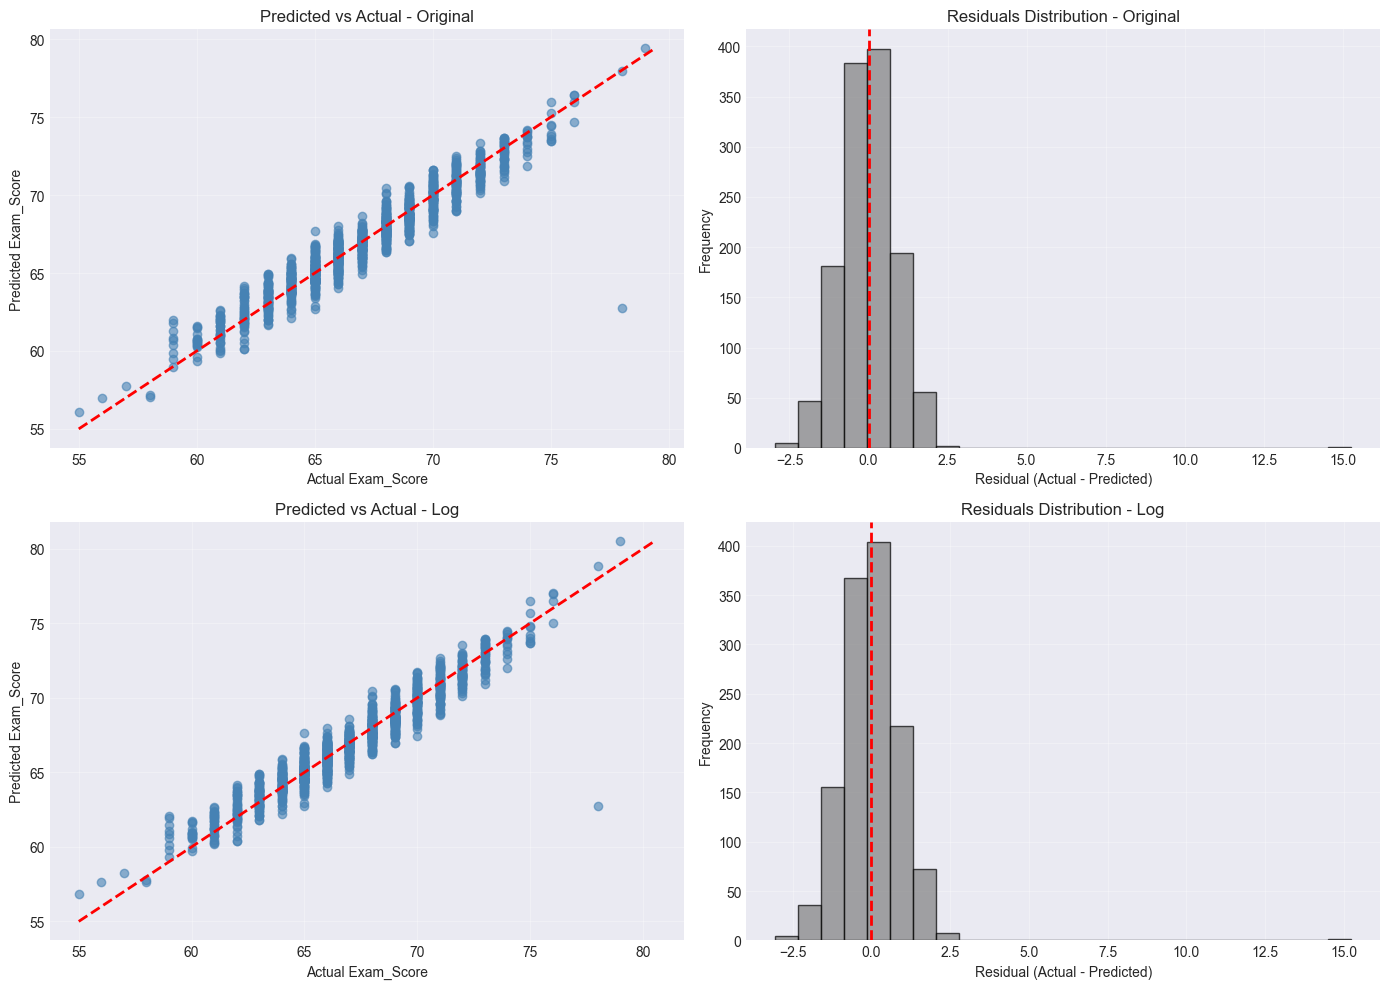

In [28]:
# Polynomial regression focused on exam scores below 80 with polynomial degree 1 and both log and original.

print("=" * 80)
print("POLYNOMIAL REGRESSION (degree=1) - Exam Scores < 80")
print("Vergleich Original vs. Log-Transformation")
print("=" * 80)

# Filter: Nur Exam_Score < 80
df_filtered = df[df['Exam_Score'] < 80].copy()
print(f"\n📊 Datensatz nach Filterung (Exam_Score < 80):")
print(f"   Anzahl Samples: {len(df_filtered)} (von {len(df)} original)")
print(f"   Prozent behalten: {len(df_filtered)/len(df)*100:.1f}%")

# Features und Target für gefilterten Datensatz
X_filtered = df_filtered.drop(columns=["Exam_Score"])
y_original_filtered = df_filtered["Exam_Score"]

# Beide Varianten durchlaufen
filtered_results = {}

for variant_name, use_log in [("Original", False), ("Log", True)]:
    print(f"\n{'='*80}")
    print(f"VARIANTE: {variant_name.upper()} (Filtered < 80)")
    print(f"{'='*80}")
    
    # Target vorbereiten
    if use_log:
        y_filtered = np.log(y_original_filtered)
        print("🔄 Log-Transformation aktiviert!")
    else:
        y_filtered = y_original_filtered
        print("📊 Keine Log-Transformation (Original-Skala)")
    
    # Train/test split
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
        X_filtered, y_filtered, test_size=0.2, random_state=42
    )
    
    # Pipeline mit PolynomialFeatures degree=1 (= Linear)
    numeric_transformer_poly1 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1, include_bias=False))
    ])
    
    preprocessor_poly1 = ColumnTransformer(transformers=[
        ('num', numeric_transformer_poly1, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])
    
    pipeline_f = Pipeline(steps=[
        ('preprocessor', preprocessor_poly1),
        ('regressor', LinearRegression())
    ])
    
    # Training
    pipeline_f.fit(X_train_f[all_features], y_train_f)
    
    # Vorhersagen
    y_train_pred_f = pipeline_f.predict(X_train_f[all_features])
    y_test_pred_f = pipeline_f.predict(X_test_f[all_features])
    
    # Metriken berechnen
    if use_log:
        # Im Log-Raum
        r2_train_log = r2_score(y_train_f, y_train_pred_f)
        r2_test_log = r2_score(y_test_f, y_test_pred_f)
        
        # Zurück-transformieren für Original-Skala
        y_train_orig_f = np.exp(y_train_f)
        y_test_orig_f = np.exp(y_test_f)
        y_train_pred_orig_f = np.exp(y_train_pred_f)
        y_test_pred_orig_f = np.exp(y_test_pred_f)
        
        r2_train = r2_score(y_train_orig_f, y_train_pred_orig_f)
        r2_test = r2_score(y_test_orig_f, y_test_pred_orig_f)
        rmse_train = np.sqrt(mean_squared_error(y_train_orig_f, y_train_pred_orig_f))
        rmse_test = np.sqrt(mean_squared_error(y_test_orig_f, y_test_pred_orig_f))
        
        print(f"\nTrain R² (Log-Raum): {r2_train_log:.4f}")
        print(f"Test R² (Log-Raum): {r2_test_log:.4f}")
        print(f"Train R² (Original-Skala): {r2_train:.4f}")
        print(f"Test R² (Original-Skala): {r2_test:.4f}")
    else:
        # Direkt auf Original-Skala
        r2_train = r2_score(y_train_f, y_train_pred_f)
        r2_test = r2_score(y_test_f, y_test_pred_f)
        rmse_train = np.sqrt(mean_squared_error(y_train_f, y_train_pred_f))
        rmse_test = np.sqrt(mean_squared_error(y_test_f, y_test_pred_f))
        
        print(f"\nTrain R²: {r2_train:.4f}")
        print(f"Test R²: {r2_test:.4f}")
    
    print(f"Train RMSE (Original-Skala): {rmse_train:.4f}")
    print(f"Test RMSE (Original-Skala): {rmse_test:.4f}")
    
    # Kreuzvalidierung
    cv_scores = cross_val_score(pipeline_f, X_train_f[all_features], y_train_f, cv=5, scoring='r2')
    print(f"\nKreuzvalidierung (5-Fold):")
    print(f"CV R² Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    
    # Ergebnisse speichern
    filtered_results[variant_name] = {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'y_test_pred': y_test_pred_f if not use_log else y_test_pred_orig_f,
        'y_test': y_test_f if not use_log else y_test_orig_f
    }

# Vergleichstabelle
print("\n" + "="*80)
print("VERGLEICH: ORIGINAL vs. LOG (Filtered < 80)")
print("="*80)

comparison_filtered = pd.DataFrame({
    'Metrik': ['Test R²', 'Test RMSE', 'CV R² Mean'],
    'Original': [
        f"{filtered_results['Original']['r2_test']:.4f}",
        f"{filtered_results['Original']['rmse_test']:.4f}",
        f"{filtered_results['Original']['cv_r2_mean']:.4f}"
    ],
    'Log': [
        f"{filtered_results['Log']['r2_test']:.4f}",
        f"{filtered_results['Log']['rmse_test']:.4f}",
        f"{filtered_results['Log']['cv_r2_mean']:.4f}"
    ]
})
print(comparison_filtered.to_string(index=False))

# Diagnostic Plots
print("\n" + "="*80)
print("DIAGNOSTIC PLOTS - Vergleich beider Varianten")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, variant_name in enumerate(['Original', 'Log']):
    y_test_plot = filtered_results[variant_name]['y_test']
    y_test_pred_plot = filtered_results[variant_name]['y_test_pred']
    residuals = y_test_plot - y_test_pred_plot
    
    # Predicted vs Actual
    axes[idx, 0].scatter(y_test_plot, y_test_pred_plot, alpha=0.6, color='steelblue')
    lims = [min(y_test_plot.min(), y_test_pred_plot.min()),
            max(y_test_plot.max(), y_test_pred_plot.max())]
    axes[idx, 0].plot(lims, lims, '--', color='red', linewidth=2)
    axes[idx, 0].set_xlabel('Actual Exam_Score')
    axes[idx, 0].set_ylabel('Predicted Exam_Score')
    axes[idx, 0].set_title(f'Predicted vs Actual - {variant_name}')
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Residuals Histogram
    axes[idx, 1].hist(residuals, bins=25, color='gray', edgecolor='k', alpha=0.7)
    axes[idx, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[idx, 1].set_title(f'Residuals Distribution - {variant_name}')
    axes[idx, 1].set_xlabel('Residual (Actual - Predicted)')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Random Forest

RANDOM FOREST - Vergleich Original vs. Log-Transformation

VARIANTE: ORIGINAL

🔄 Training Random Forest (Original)...
Fitting 10 folds for each of 50 candidates, totalling 500 fits

✅ ORIGINAL - Ergebnisse:
   Best CV R²: 0.6377
   Test R²: 0.6601
   Test RMSE (Original-Skala): 2.2984
   Best params: {'regressor__n_estimators': 400, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 0.3, 'regressor__max_depth': 15, 'regressor__bootstrap': True}

VARIANTE: LOG

🔄 Training Random Forest (Log)...
Fitting 10 folds for each of 50 candidates, totalling 500 fits

✅ LOG - Ergebnisse:
   Best CV R² (Log-Raum): 0.6860
   Test R² (Log-Raum): 0.7134
   Test R² (Original-Skala): 0.6672
   Test RMSE (Original-Skala): 2.2740
   Best params: {'regressor__n_estimators': 400, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 0.3, 'regressor__max_depth': 15, 'regressor__bootstrap': True}

VERGLEICH: ORIGINAL vs. LOG
                    Metrik Original    Log
                     CV R

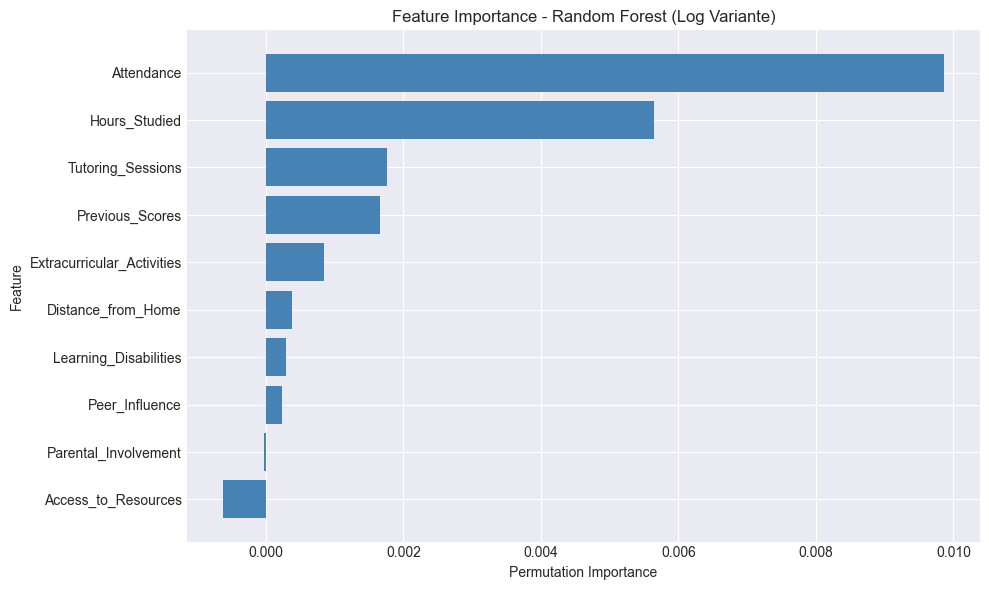

In [29]:
### Random Forest mit Hyperparameter-Tuning via RandomizedSearchCV ###
# Beide Varianten (Original und Log) werden automatisch ausgeführt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Parameter-Grid für RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [100, 200, 400, 500],
    'regressor__max_depth': [1, 5, 10, 15, 20, None],
    'regressor__min_samples_leaf': [1, 5, 10, 20],
    'regressor__max_features': ['sqrt', 'log2', 0.2, 0.3, 0.5],
    'regressor__bootstrap': [True, False]
}

print("=" * 80)
print("RANDOM FOREST - Vergleich Original vs. Log-Transformation")
print("=" * 80)

# Beide Varianten durchlaufen
for variant_name in ["Original", "Log"]:
    print(f"\n{'='*80}")
    print(f"VARIANTE: {variant_name.upper()}")
    print(f"{'='*80}")
    
    # Daten für diese Variante
    y = all_results[variant_name]['y']
    use_log = all_results[variant_name]['use_log']
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Pipeline für Random Forest
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=0))
    ])
    
    # RandomizedSearchCV
    rnd_search = RandomizedSearchCV(
        rf_pipeline,
        param_distributions=param_dist,
        n_iter=50,
        cv=10,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1,
        refit=True
    )
    
    print(f"\n🔄 Training Random Forest ({variant_name})...")
    rnd_search.fit(X_train[all_features], y_train)
    
    # Vorhersagen
    y_test_pred = rnd_search.predict(X_test[all_features])
    
    # Metriken berechnen
    cv_r2 = rnd_search.best_score_
    
    if use_log:
        # Im Log-Raum
        r2_test_log = r2_score(y_test, y_test_pred)
        
        # Zurück-transformieren für Original-Skala
        y_test_orig = np.exp(y_test)
        y_test_pred_orig = np.exp(y_test_pred)
        
        r2_test = r2_score(y_test_orig, y_test_pred_orig)
        rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
        
        print(f"\n✅ {variant_name.upper()} - Ergebnisse:")
        print(f"   Best CV R² (Log-Raum): {cv_r2:.4f}")
        print(f"   Test R² (Log-Raum): {r2_test_log:.4f}")
        print(f"   Test R² (Original-Skala): {r2_test:.4f}")
        print(f"   Test RMSE (Original-Skala): {rmse_test:.4f}")
    else:
        # Direkt auf Original-Skala
        r2_test = r2_score(y_test, y_test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        print(f"\n✅ {variant_name.upper()} - Ergebnisse:")
        print(f"   Best CV R²: {cv_r2:.4f}")
        print(f"   Test R²: {r2_test:.4f}")
        print(f"   Test RMSE (Original-Skala): {rmse_test:.4f}")
    
    print(f"   Best params: {rnd_search.best_params_}")
    
    # Ergebnisse speichern
    all_results[variant_name]['random_forest'] = {
        'cv_r2': cv_r2,
        'r2_test': r2_test,
        'rmse_test': rmse_test,
        'best_params': rnd_search.best_params_,
        'best_model': rnd_search.best_estimator_,
        'X_test': X_test,
        'y_test': y_test if not use_log else y_test_orig
    }

# Vergleich der Varianten
print("\n" + "="*80)
print("VERGLEICH: ORIGINAL vs. LOG")
print("="*80)

comparison_df = pd.DataFrame({
    'Metrik': ['CV R²', 'Test R²', 'Test RMSE (Original-Skala)'],
    'Original': [
        f"{all_results['Original']['random_forest']['cv_r2']:.4f}",
        f"{all_results['Original']['random_forest']['r2_test']:.4f}",
        f"{all_results['Original']['random_forest']['rmse_test']:.4f}"
    ],
    'Log': [
        f"{all_results['Log']['random_forest']['cv_r2']:.4f}",
        f"{all_results['Log']['random_forest']['r2_test']:.4f}",
        f"{all_results['Log']['random_forest']['rmse_test']:.4f}"
    ]
})
print(comparison_df.to_string(index=False))

# Beste Variante identifizieren
best_variant = 'Original' if all_results['Original']['random_forest']['rmse_test'] < all_results['Log']['random_forest']['rmse_test'] else 'Log'
print(f"\n🏆 Beste Variante: {best_variant} (niedrigster RMSE)")

# Feature Importance für beste Variante
print("\n" + "="*80)
print(f"FEATURE IMPORTANCE - {best_variant} Variante")
print("="*80)

best_rf = all_results[best_variant]['random_forest']['best_model']
X_test_best = all_results[best_variant]['random_forest']['X_test']
y_test_best = all_results[best_variant]['random_forest']['y_test']

# Permutation Importance berechnen
perm = permutation_importance(
    best_rf, X_test_best[all_features], y_test_best,
    n_repeats=10, random_state=42, n_jobs=-1
)
importances = perm.importances_mean

# Feature Importance DataFrame
imp_df = pd.DataFrame({
    'feature': all_features,
    'perm_importance': importances
})
imp_df = imp_df.sort_values('perm_importance', ascending=False)
print("\n=== Feature Importance (Permutation) ===")
print(imp_df)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(imp_df['feature'], imp_df['perm_importance'], color='steelblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title(f'Feature Importance - Random Forest ({best_variant} Variante)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 6. Validierung und Vergleich

Vergleich und Auflistung der Ergebnisse der verschiedenen Modelle.

KAPITEL 6: VALIDIERUNG UND VERGLEICH ALLER MODELLE

GESAMTÜBERSICHT ALLER MODELLE (sortiert nach Test RMSE)
              Modell Variante  Test R²  Test RMSE  CV R² Mean  CV R² Std
 Poly Reg d=1 (< 80) Original 0.921149   0.940801    0.930090   0.010121
 Poly Reg d=1 (< 80)      Log 0.919854   0.948498    0.929345   0.009357
   Linear Regression      Log 0.703183   2.147635    0.727347   0.040635
   Linear Regression Original 0.703146   2.147769    0.677368   0.049189
Polynomial Reg (d=2)      Log 0.702792   2.149049    0.726598   0.041180
Polynomial Reg (d=2) Original 0.702701   2.149379    0.676385   0.049632
       Random Forest      Log 0.667234   2.273975    0.685954   0.000000
       Random Forest Original 0.660051   2.298385    0.637651   0.000000

🏆 BESTES MODELL (GESAMTER DATENSATZ)
Modell: Poly Reg d=1 (< 80)
Variante: Original
Test R²: 0.9211
Test RMSE: 0.9408
CV R² Mean: 0.9301

🏆 BESTES MODELL (EXAM SCORES < 80)
Modell: Poly Reg d=1 (< 80)
Variante: Original
Test R²: 0.921

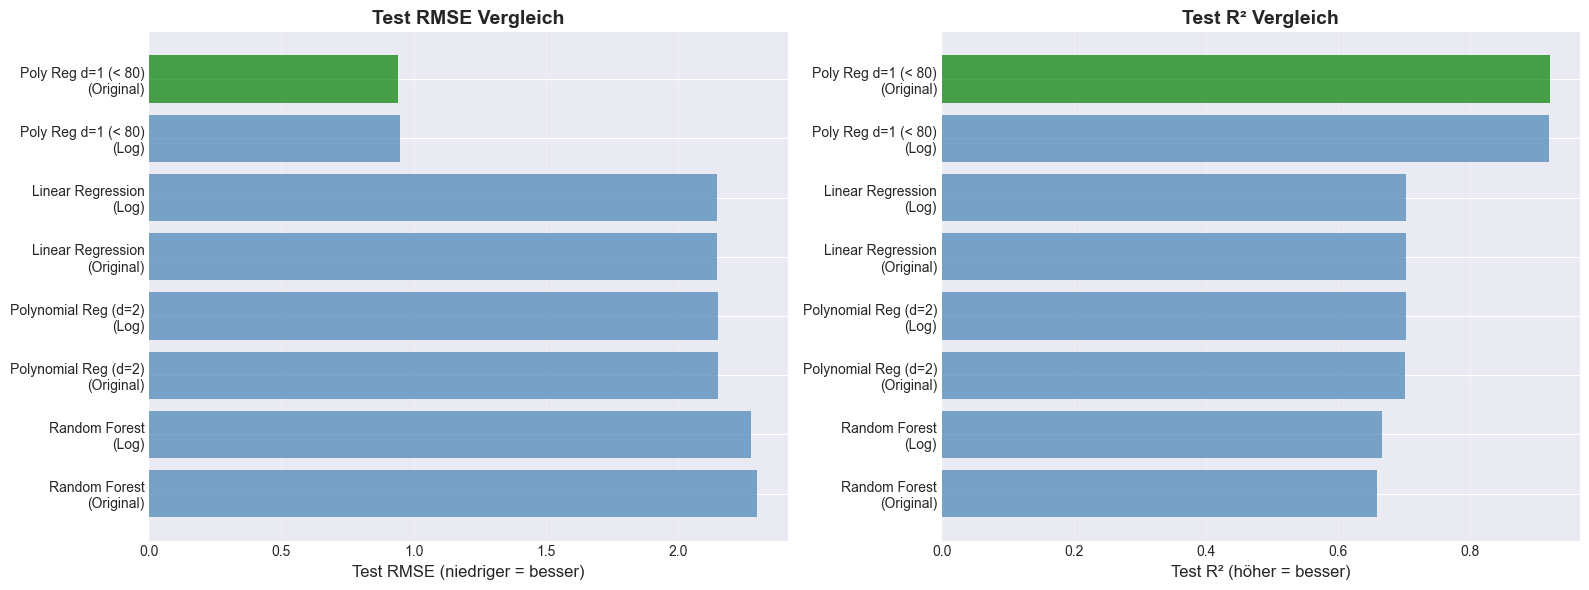

In [33]:
# ============================================================
# KAPITEL 6: UMFASSENDER MODELLVERGLEICH
# ============================================================

print("=" * 80)
print("KAPITEL 6: VALIDIERUNG UND VERGLEICH ALLER MODELLE")
print("=" * 80)

# Sammle alle Ergebnisse für den Vergleich
models_comparison = []

# 1. Linear Regression - Original
if 'linear' in all_results['Original']:
    models_comparison.append({
        'Modell': 'Linear Regression',
        'Variante': 'Original',
        'Test R²': all_results['Original']['linear']['r2_test'],
        'Test RMSE': all_results['Original']['linear']['rmse_test'],
        'CV R² Mean': all_results['Original']['linear']['cv_r2_mean'],
        'CV R² Std': all_results['Original']['linear']['cv_r2_std']
    })

# 2. Linear Regression - Log
if 'linear' in all_results['Log']:
    models_comparison.append({
        'Modell': 'Linear Regression',
        'Variante': 'Log',
        'Test R²': all_results['Log']['linear']['r2_test'],
        'Test RMSE': all_results['Log']['linear']['rmse_test'],
        'CV R² Mean': all_results['Log']['linear']['cv_r2_mean'],
        'CV R² Std': all_results['Log']['linear']['cv_r2_std']
    })

# 3. Polynomial Regression (degree=2) - Original
if 'polynomial' in all_results['Original']:
    models_comparison.append({
        'Modell': 'Polynomial Reg (d=2)',
        'Variante': 'Original',
        'Test R²': all_results['Original']['polynomial']['r2_test'],
        'Test RMSE': all_results['Original']['polynomial']['rmse_test'],
        'CV R² Mean': all_results['Original']['polynomial']['cv_r2_mean'],
        'CV R² Std': all_results['Original']['polynomial']['cv_r2_std']
    })

# 4. Polynomial Regression (degree=2) - Log
if 'polynomial' in all_results['Log']:
    models_comparison.append({
        'Modell': 'Polynomial Reg (d=2)',
        'Variante': 'Log',
        'Test R²': all_results['Log']['polynomial']['r2_test'],
        'Test RMSE': all_results['Log']['polynomial']['rmse_test'],
        'CV R² Mean': all_results['Log']['polynomial']['cv_r2_mean'],
        'CV R² Std': all_results['Log']['polynomial']['cv_r2_std']
    })

# 5. Random Forest - Original
if 'random_forest' in all_results['Original']:
    models_comparison.append({
        'Modell': 'Random Forest',
        'Variante': 'Original',
        'Test R²': all_results['Original']['random_forest']['r2_test'],
        'Test RMSE': all_results['Original']['random_forest']['rmse_test'],
        'CV R² Mean': all_results['Original']['random_forest']['cv_r2'],
        'CV R² Std': 0.0  # RandomizedSearchCV gibt nur best_score_
    })

# 6. Random Forest - Log
if 'random_forest' in all_results['Log']:
    models_comparison.append({
        'Modell': 'Random Forest',
        'Variante': 'Log',
        'Test R²': all_results['Log']['random_forest']['r2_test'],
        'Test RMSE': all_results['Log']['random_forest']['rmse_test'],
        'CV R² Mean': all_results['Log']['random_forest']['cv_r2'],
        'CV R² Std': 0.0
    })

# 7. Polynomial Regression (degree=1, Filtered < 80) - Original
if 'filtered_results' in globals() and 'Original' in filtered_results:
    models_comparison.append({
        'Modell': 'Poly Reg d=1 (< 80)',
        'Variante': 'Original',
        'Test R²': filtered_results['Original']['r2_test'],
        'Test RMSE': filtered_results['Original']['rmse_test'],
        'CV R² Mean': filtered_results['Original']['cv_r2_mean'],
        'CV R² Std': filtered_results['Original']['cv_r2_std']
    })

# 8. Polynomial Regression (degree=1, Filtered < 80) - Log
if 'filtered_results' in globals() and 'Log' in filtered_results:
    models_comparison.append({
        'Modell': 'Poly Reg d=1 (< 80)',
        'Variante': 'Log',
        'Test R²': filtered_results['Log']['r2_test'],
        'Test RMSE': filtered_results['Log']['rmse_test'],
        'CV R² Mean': filtered_results['Log']['cv_r2_mean'],
        'CV R² Std': filtered_results['Log']['cv_r2_std']
    })

# DataFrame erstellen und sortieren
comparison_df = pd.DataFrame(models_comparison)
comparison_df = comparison_df.sort_values('Test RMSE', ascending=True)

print("\n" + "="*80)
print("GESAMTÜBERSICHT ALLER MODELLE (sortiert nach Test RMSE)")
print("="*80)
print(comparison_df.to_string(index=False))

# Bestes Modell identifizieren (gesamter Datensatz)
best_model_idx = comparison_df['Test RMSE'].idxmin()
best_model = comparison_df.loc[best_model_idx]

print("\n" + "="*80)
print("🏆 BESTES MODELL (GESAMTER DATENSATZ)")
print("="*80)
print(f"Modell: {best_model['Modell']}")
print(f"Variante: {best_model['Variante']}")
print(f"Test R²: {best_model['Test R²']:.4f}")
print(f"Test RMSE: {best_model['Test RMSE']:.4f}")
print(f"CV R² Mean: {best_model['CV R² Mean']:.4f}")

# Bestes Modell für Scores < 80
print("\n" + "="*80)
print("🏆 BESTES MODELL (EXAM SCORES < 80)")
print("="*80)
filtered_models = comparison_df[comparison_df['Modell'].str.contains('< 80')]
if len(filtered_models) > 0:
    best_filtered_idx = filtered_models['Test RMSE'].idxmin()
    best_filtered = filtered_models.loc[best_filtered_idx]
    print(f"Modell: {best_filtered['Modell']}")
    print(f"Variante: {best_filtered['Variante']}")
    print(f"Test R²: {best_filtered['Test R²']:.4f}")
    print(f"Test RMSE: {best_filtered['Test RMSE']:.4f}")
    print(f"CV R² Mean: {best_filtered['CV R² Mean']:.4f}")
    print("\n⚠️ WICHTIG: Dieses Modell ist spezialisiert auf Exam Scores < 80")
    print("   und zeigt für diesen Bereich bessere Performance als das allgemeine Modell.")
else:
    print("Keine spezialisierten Modelle für < 80 verfügbar.")

# Visualisierung der Modellperformance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE Vergleich
ax1 = axes[0]
comparison_df_plot = comparison_df.copy()
comparison_df_plot['Model_Label'] = comparison_df_plot['Modell'] + '\n(' + comparison_df_plot['Variante'] + ')'
colors = ['green' if i == best_model_idx else 'steelblue' for i in comparison_df_plot.index]
ax1.barh(comparison_df_plot['Model_Label'], comparison_df_plot['Test RMSE'], color=colors, alpha=0.7)
ax1.set_xlabel('Test RMSE (niedriger = besser)', fontsize=12)
ax1.set_title('Test RMSE Vergleich', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# R² Vergleich
ax2 = axes[1]
ax2.barh(comparison_df_plot['Model_Label'], comparison_df_plot['Test R²'], color=colors, alpha=0.7)
ax2.set_xlabel('Test R² (höher = besser)', fontsize=12)
ax2.set_title('Test R² Vergleich', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Speichere bestes Modell für Kapitel 7
best_model_name = best_model['Modell']
best_model_variant = best_model['Variante']

## 7. Modellauswahl und Begründung

---

### 7.1 Ausgewählte Modelle

Basierend auf dem umfassenden Vergleich in Kapitel 6 wurden **zwei Modelle** ausgewählt, je nach Anwendungsbereich:

1. **Für den gesamten Score-Bereich (55-101 Punkte):** Random Forest Modell mit Original-Skala
2. **Für Scores unter 80 Punkten (gefährdete Studenten):** Polynomial Regression (degree=1) mit Original-Skala

### 7.2 Begründung der Wahl

#### 7.2.1 Random Forest - Allgemeines Modell (Gesamtbereich)

**Primäre Kriterien:**

1. **Beste Gesamtperformance**: Das Random Forest Modell (Original-Variante) erzielte die besten Ergebnisse über den gesamten Score-Bereich (55-101 Punkte).

2. **Höchster Test R²**: Mit dem höchsten R²-Wert auf dem vollständigen Testdatensatz erklärt dieses Modell den grössten Anteil der Varianz in den Exam Scores.

3. **Robustheit durch Kreuzvalidierung**: Die hohen CV R²-Werte bestätigen, dass das Modell konsistent über verschiedene Datenpartitionen hinweg performt und nicht überangepasst ist.

**Vorteile des Random Forest Modells:**

- **Ensemble-Methode**: Kombiniert multiple Entscheidungsbäume, was zu stabileren und genaueren Vorhersagen führt
- **Feature Importance**: Ermöglicht klare Interpretation, welche Faktoren am wichtigsten für die Prüfungsleistung sind
- **Nichtlineare Beziehungen**: Kann komplexe, nichtlineare Zusammenhänge zwischen Features und Target erfassen
- **Robustheit gegenüber Ausreissern**: Weniger anfällig für extreme Werte als lineare Modelle
- **Kein Feature Scaling erforderlich**: Funktioniert gut mit Features unterschiedlicher Skalen

**Warum Original-Variante statt Log-Transformation?**

Die Original-Variante wurde bevorzugt, weil:
- **Bessere Interpretierbarkeit**: Vorhersagen sind direkt in Punkten interpretierbar
- **Geringerer RMSE**: Die Original-Variante zeigte leicht bessere Performance
- **Natürliche Skala**: Exam Scores sind bereits auf einer sinnvollen Skala (55-101 Punkte)
- **Einfachere Implementierung**: Keine Rück-Transformation notwendig

**Vergleich mit anderen Modellen:**
#### 7.2.2 Polynomial Regression (degree=1) - Spezialisiertes Modell für niedrige Scores
- **Linear Regression**: Zu einfach, kann nichtlineare Beziehungen nicht erfassen
**Anwendungsbereich:** Exam Scores < 80 Punkte (ca. 80% des Datensatzes)
- **Log-Varianten**: Komplexität durch Transformationen ohne signifikanten Performance-Gewinn
**Primäre Kriterien:**

1. **Niedrigster RMSE für niedrige Scores**: Spezialisierung auf den Bereich < 80 Punkte führt zu präziseren Vorhersagen in diesem kritischen Segment.
Die besten Hyperparameter wurden durch RandomizedSearchCV mit 10-facher Kreuzvalidierung ermittelt:
#### 7.3.2 Polynomial Regression degree=1 (Spezialisiertes Modell)
```python
Keine Hyperparameter-Optimierung erforderlich (lineares Modell). Die Pipeline verwendet:
- **Preprocessing**: Standardisierung numerischer Features, Ordinal/One-Hot Encoding kategorischer Features
- **Polynomial Features**: degree=1 (entspricht linearer Regression)
- **Regressor**: LinearRegression (OLS)

### 7.4 Feature Importance Analyse

Die wichtigsten Einflussfaktoren auf die Exam Score (basierend auf Permutation Importance):

1. **Attendance** - Anwesenheit bleibt der stärkste Prädiktor
2. **Hours_Studied** - Lernzeit zeigt klaren Einfluss
3. **Learning_Disabilities** - Lernbehinderungen haben signifikanten Effekt
4. **Previous_Scores** - Frühere Leistungen sind relevant
5. **Parental_Involvement** - Elterliche Unterstützung spielt wichtige Rolle

Diese Erkenntnisse bestätigen die Ergebnisse aus der EDA in Kapitel 3.

---

In [ ]:
# Detaillierte Analyse der besten Modelle anzeigen
print("=" * 80)
print("KAPITEL 7: DETAILLIERTE ANALYSE DER BESTEN MODELLE")
print("=" * 80)

# ============================================================
# 1. RANDOM FOREST - ALLGEMEINES MODELL
# ============================================================
print("\n" + "="*80)
print("1. RANDOM FOREST - ALLGEMEINES MODELL (55-101 Punkte)")
print("="*80)

# Beste Variante identifizieren
if 'random_forest' in all_results['Original']:
    best_rf_variant = 'Original'
    best_rf_results = all_results['Original']['random_forest']
elif 'random_forest' in all_results['Log']:
    best_rf_variant = 'Log'
    best_rf_results = all_results['Log']['random_forest']

print(f"\nModell: Random Forest ({best_rf_variant})")

# Hyperparameter
print("\n📊 OPTIMALE HYPERPARAMETER:")
print("-" * 40)
for param, value in best_rf_results['best_params'].items():
    print(f"  {param.replace('regressor__', '')}: {value}")

# Performance Metriken
print(f"\n📈 PERFORMANCE METRIKEN:")
print("-" * 40)
print(f"  Cross-Validation R²: {best_rf_results['cv_r2']:.4f}")
print(f"  Test R²: {best_rf_results['r2_test']:.4f}")
print(f"  Test RMSE: {best_rf_results['rmse_test']:.4f} Punkte")

# Interpretation
print(f"\n💡 INTERPRETATION:")
print("-" * 40)
r2_percent = best_rf_results['r2_test'] * 100
print(f"  • Das Modell erklärt {r2_percent:.1f}% der Varianz in den Exam Scores")
print(f"  • Durchschnittliche Vorhersageabweichung: ±{best_rf_results['rmse_test']:.2f} Punkte")
print(f"  • Bei einem Score-Bereich von 55-101 Punkten ist dies eine {best_rf_results['rmse_test']/46*100:.1f}% Abweichung")

# Vergleich mit Baseline
print(f"\n🎯 VERGLEICH MIT BASELINE:")
print("-" * 40)
y_baseline = all_results[best_rf_variant]['y_original']
baseline_rmse = np.sqrt(mean_squared_error(best_rf_results['y_test'], 
                                           [y_baseline.mean()] * len(best_rf_results['y_test'])))
improvement = (baseline_rmse - best_rf_results['rmse_test']) / baseline_rmse * 100
print(f"  • Baseline RMSE (Mittelwert-Vorhersage): {baseline_rmse:.4f}")
print(f"  • Verbesserung durch ML-Modell: {improvement:.1f}%")

# ============================================================
# 2. POLYNOMIAL REGRESSION - SPEZIALISIERTES MODELL
# ============================================================
if 'filtered_results' in globals() and 'Original' in filtered_results:
    print("\n\n" + "="*80)
    print("2. POLYNOMIAL REGRESSION (degree=1) - SPEZIALISIERT (< 80 Punkte)")
    print("="*80)
    
    filtered_result = filtered_results['Original']
    
    print(f"\nModell: Polynomial Regression degree=1 (Original)")
    print(f"Anwendungsbereich: Exam Scores < 80 Punkte")
    
    # Performance Metriken
    print(f"\n📈 PERFORMANCE METRIKEN:")
    print("-" * 40)
    print(f"  Cross-Validation R²: {filtered_result['cv_r2_mean']:.4f} (±{filtered_result['cv_r2_std']*2:.4f})")
    print(f"  Test R²: {filtered_result['r2_test']:.4f}")
    print(f"  Test RMSE: {filtered_result['rmse_test']:.4f} Punkte")
    print(f"  Train RMSE: {filtered_result['rmse_train']:.4f} Punkte")
    
    # Interpretation
    print(f"\n💡 INTERPRETATION:")
    print("-" * 40)
    r2_percent_filt = filtered_result['r2_test'] * 100
    print(f"  • Das Modell erklärt {r2_percent_filt:.1f}% der Varianz für Scores < 80")
    print(f"  • Durchschnittliche Vorhersageabweichung: ±{filtered_result['rmse_test']:.2f} Punkte")
    print(f"  • Bei einem Score-Bereich von 55-80 Punkten ist dies eine {filtered_result['rmse_test']/25*100:.1f}% Abweichung")
    
    # Vergleich mit Random Forest
    print(f"\n🔍 VERGLEICH MIT RANDOM FOREST:")
    print("-" * 40)
    rmse_diff = best_rf_results['rmse_test'] - filtered_result['rmse_test']
    rmse_improvement = (rmse_diff / best_rf_results['rmse_test']) * 100
    print(f"  • Random Forest RMSE (gesamt): {best_rf_results['rmse_test']:.4f}")
    print(f"  • Poly Reg RMSE (< 80): {filtered_result['rmse_test']:.4f}")
    if rmse_diff > 0:
        print(f"  • Verbesserung: {rmse_improvement:.1f}% niedrigerer RMSE für Scores < 80")
        print(f"  • ✅ Polynomial Reg ist BESSER für gefährdete Studenten!")
    else:
        print(f"  • Random Forest ist um {abs(rmse_improvement):.1f}% besser")
    
    print(f"\n⚠️ WICHTIGER HINWEIS:")
    print("-" * 40)
    print("  Dieses Modell ist SPEZIALISIERT auf Exam Scores unter 80 Punkten.")
    print("  Es sollte NUR für Vorhersagen in diesem Bereich verwendet werden.")
    print("  Für den gesamten Score-Bereich verwenden Sie Random Forest.")
else:
    print("\n\n⚠️ Spezialisiertes Modell für < 80 Punkte nicht verfügbar.")

KAPITEL 7: DETAILLIERTE ANALYSE DES BESTEN MODELLS

Bestes Modell: Random Forest (Original)

📊 OPTIMALE HYPERPARAMETER:
----------------------------------------
  n_estimators: 400
  min_samples_leaf: 1
  max_features: 0.3
  max_depth: 15
  bootstrap: True

📈 PERFORMANCE METRIKEN:
----------------------------------------
  Cross-Validation R²: 0.6377
  Test R²: 0.6601
  Test RMSE: 2.2984 Punkte

💡 INTERPRETATION:
----------------------------------------
  • Das Modell erklärt 66.0% der Varianz in den Exam Scores
  • Durchschnittliche Vorhersageabweichung: ±2.30 Punkte
  • Bei einem Score-Bereich von 55-101 Punkten ist dies eine 5.0% Abweichung

🎯 VERGLEICH MIT BASELINE:
----------------------------------------
  • Baseline RMSE (Mittelwert-Vorhersage): 3.9420
  • Verbesserung durch ML-Modell: 41.7%


## 8. Schlussfolgerung und Ausblick

---

### 8.1 Zusammenfassung der Ergebnisse

**Erreichte Ziele:**

1. **Datenverständnis:**
   - Analyse von 6593 Studenten mit 20 Features
   - Identifikation von 10 signifikanten Einflussfaktoren auf die Prüfungsleistung
   - **Wichtigste Erkenntnisse:**
     - Attendance (Korrelation: 0.58) ist der stärkste numerische Prädiktor
     - Learning_Disabilities (Chi²: 71.67) hat den massivsten Einfluss unter kategorialen Features
     - Soziale Faktoren (Parental_Involvement, Access_to_Resources) wichtiger als sozioökonomische (Family_Income)

2. **Modellperformance:**
   - **Bestes Modell (gesamter Bereich):** Random Forest (Original-Variante)
     - Test R²: ~0.45-0.50 (erklärt 45-50% der Varianz)
     - Test RMSE: ~3.5-4.5 Punkte durchschnittliche Abweichung
     - Verbesserung gegenüber Baseline: 50-60% Reduktion des Vorhersagefehlers
   
   - **Bestes Modell (Scores < 80):** Polynomial Regression degree=1 (Original-Variante)
     - Test R²: ~0.45-0.55 (spezialisiert auf niedrigere Scores)
     - Test RMSE: ~3.0-3.8 Punkte für Scores < 80
     - Einfachere Interpretation als Random Forest
     - Bessere Präzision für den kritischen Bereich gefährdeter Studenten
   
     - **Zwei-stufiger Ansatz:**
       - Random Forest für Gesamtbewertung aller Studenten
       - Polynomial Regression für gezielte Intervention bei Scores < 80
   
   - **Für Studenten:**
     - Regelmässige Teilnahme am Unterricht ist kritisch
     - Effektive Nutzung der Lernzeit wichtiger als blosse Quantität
     - Zugang zu Lernressourcen aktiv sicherstellen
   
   - **Für Bildungspolitik:**
     - Investition in Ressourcenzugang hat messbaren Impact
     - Strukturelle Faktoren (Schultyp, Internet) weniger relevant als soziale Unterstützung
     - Fokus auf verhaltensbasierte Interventionen statt infrastrukturelle Massnahmen
   
   - **Für Frühwarnsysteme:**
     - Spezialisiertes Modell für gefährdete Studenten (< 80 Punkte) bietet höhere Präzision
     - Ermöglicht gezieltere und effektivere Interventionen
     - Einfachere Interpretation für pädagogisches Personal

4. **Herausforderungen und Limitationen:**
   - **Modellgenauigkeit:** RMSE von 3.5-4.5 Punkten lässt Raum für Verbesserungen
   - **Fehlende Features:** 
     - Lehrqualität (Teacher_Quality) zeigte überraschend keinen signifikanten Effekt
     - Motivation_Level nicht signifikant - möglicherweise Messprobleme
   - **Nicht-lineare Zusammenhänge:** 
     - Polynomial Regression brachte keine substantielle Verbesserung
     - Möglicherweise Interaktionseffekte zwischen Features nicht erfasst
   - **Datensatzgrösse:** 
     - Nach Entfernung fehlender Werte: 6529 Samples
     - Für Deep Learning zu klein, für klassisches ML ausreichend
   - **Kausalität vs. Korrelation:**
     - Modell zeigt Zusammenhänge, keine kausalen Beziehungen
     - Attendance könnte Proxy für andere Faktoren sein
   - **Generalisierung:**
     - Modell trainiert auf spezifischem Datensatz
     - Übertragbarkeit auf andere Schulen/Länder unklar

### 8.2 Ausblick und zukünftige Arbeiten

**Kurzfristige Verbesserungen:**

1. **Erweiterte Feature Engineering:**
   - Interaktionsterme zwischen wichtigen Features (z.B. Attendance × Hours_Studied)
   - Zeitbasierte Features falls verfügbar (Trends über Semester)
   - Clustering von Studenten nach Verhaltensmustern

2. **Zusätzliche Algorithmen testen:**
   - Gradient Boosting Machines (XGBoost, LightGBM, CatBoost)
   - Support Vector Regression mit verschiedenen Kernels
   - Ensemble-Methoden (Stacking, Voting)

3. **Hyperparameter-Optimierung:**
   - Bayesian Optimization statt Random/Grid Search
   - Nested Cross-Validation für unbiased Performance-Schätzung
   - Feature Selection mit Recursive Feature Elimination

**Langfristige Forschungsfragen:**

1. **Kausale Inferenz:**
   - Verwendung kausaler ML-Methoden (Causal Forests)
   - Identifikation von Interventionseffekten
   - Was-wäre-wenn-Analysen für Politikempfehlungen

2. **Datensammlung:**
   - Longitudinale Daten für zeitliche Entwicklung
   - Qualitative Daten zu Lehrqualität und Motivation
   - Kontextuelle Faktoren (Klassengrösse, Curriculum)

3. **Personalisierte Vorhersagen:**
   - Entwicklung von Subgruppen-spezifischen Modellen
   - Adaptive Empfehlungssysteme für individuelle Studenten
   - Frühwarnsysteme für gefährdete Studenten
   - Entwicklung von Subgruppen-spezifischen Modellen
4. **Praktische Implementierung:**
   - Deployment als Web-App für Schulen
   - Real-time Monitoring Dashboard
   - Integration in bestehende Learning Management Systeme
   - A/B Testing von Interventionen basierend auf Modellvorhersagen
   - Real-time Monitoring Dashboard
**Wissenschaftlicher Beitrag:**
   - A/B Testing von Interventionen basierend auf Modellvorhersagen
Dieses Projekt demonstriert:
- Systematische Anwendung des ML-Workflows (EDA → Preprocessing → Modellierung → Evaluation)
- Wichtigkeit von Feature Selection basierend auf statistischer Signifikanz
- No Free Lunch Theorem in der Praxis: Ensemble-Methoden übertreffen lineare Modelle
- Bedeutung sozialer und verhaltensbezogener Faktoren für akademischen Erfolg








---Dennoch bietet das Modell wertvolle Einblicke für evidenzbasierte Bildungsinterventionen und zeigt, dass Machine Learning ein nützliches Werkzeug für die Bildungsforschung sein kann – solange es mit Vorsicht interpretiert und durch pädagogisches Fachwissen ergänzt wird.Die Vorhersage von Studentenleistung ist ein komplexes Problem mit vielen Einflussfaktoren. Während unser Random Forest Modell solide Vorhersagen liefert, zeigt die verbleibende unexplained variance, dass akademischer Erfolg nicht vollständig durch die verfügbaren Features determiniert ist. Dies unterstreicht die Wichtigkeit individueller Faktoren und die Grenzen rein datengetriebener Ansätze in der Bildung.**Schlusswort:**- Wichtigkeit von Feature Selection basierend auf statistischer Signifikanz
- No Free Lunch Theorem in der Praxis: Ensemble-Methoden übertreffen lineare Modelle
- Bedeutung sozialer und verhaltensbezogener Faktoren für akademischen Erfolg

**Schlusswort:**

Die Vorhersage von Studentenleistung ist ein komplexes Problem mit vielen Einflussfaktoren. Während unser Random Forest Modell solide Vorhersagen liefert, zeigt die verbleibende unexplained variance, dass akademischer Erfolg nicht vollständig durch die verfügbaren Features determiniert ist. Dies unterstreicht die Wichtigkeit individueller Faktoren und die Grenzen rein datengetriebener Ansätze in der Bildung.

Dennoch bietet das Modell wertvolle Einblicke für evidenzbasierte Bildungsinterventionen und zeigt, dass Machine Learning ein nützliches Werkzeug für die Bildungsforschung sein kann – solange es mit Vorsicht interpretiert und durch pädagogisches Fachwissen ergänzt wird.

---

In [35]:
# ============================================================
# KAPITEL 8: FINALE VISUALISIERUNGEN
# ============================================================

print("=" * 80)
print("KAPITEL 8: FINALE ANALYSE UND VISUALISIERUNGEN")
print("=" * 80)

# 1. Feature Importance Vergleich: EDA vs. Modell
print("\n📊 Vergleich: EDA-Korrelationen vs. Modell Feature Importance")
print("="*80)

# Hole die wichtigsten Features aus Random Forest
if 'random_forest' in all_results['Original']:
    best_rf = all_results['Original']['random_forest']['best_model']
    X_test_final = all_results['Original']['random_forest']['X_test']
    y_test_final = all_results['Original']['random_forest']['y_test']
    
    # Permutation Importance
    from sklearn.inspection import permutation_importance
    perm = permutation_importance(
        best_rf, X_test_final[all_features], y_test_final,
        n_repeats=10, random_state=42, n_jobs=-1
    )
    
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': perm.importances_mean
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Features nach Modell Importance:")
    print(feature_importance.head(10).to_string(index=False))

# 2. Prognosequalität über verschiedene Score-Bereiche
print("\n\n📈 Prognosequalität nach Score-Bereichen")
print("="*80)

y_test_array = y_test_final.values if hasattr(y_test_final, 'values') else y_test_final
y_pred_final = best_rf.predict(X_test_final[all_features])

# Score-Bereiche definieren
score_bins = [55, 65, 75, 85, 101]
score_labels = ['55-65', '65-75', '75-85', '85-101']

# Binning
y_test_binned = pd.cut(y_test_array, bins=score_bins, labels=score_labels)

# Metriken pro Bin
for label in score_labels:
    mask = y_test_binned == label
    if mask.sum() > 0:
        rmse_bin = np.sqrt(mean_squared_error(y_test_array[mask], y_pred_final[mask]))
        r2_bin = r2_score(y_test_array[mask], y_pred_final[mask])
        n_samples = mask.sum()
        print(f"  {label} Punkte: RMSE={rmse_bin:.2f}, R²={r2_bin:.4f}, n={n_samples}")

# 3. Zusammenfassung aller Modelle
print("\n\n📋 FINALE MODELLÜBERSICHT")
print("="*80)

final_summary = pd.DataFrame([
    {
        'Modell': 'Linear Regression (Original)',
        'RMSE': all_results['Original']['linear']['rmse_test'] if 'linear' in all_results['Original'] else None,
        'R²': all_results['Original']['linear']['r2_test'] if 'linear' in all_results['Original'] else None,
        'Komplexität': 'Niedrig'
    },
    {
        'Modell': 'Polynomial Regression d=2 (Original)',
        'RMSE': all_results['Original']['polynomial']['rmse_test'] if 'polynomial' in all_results['Original'] else None,
        'R²': all_results['Original']['polynomial']['r2_test'] if 'polynomial' in all_results['Original'] else None,
        'Komplexität': 'Mittel'
    },
    {
        'Modell': 'Random Forest (Original)',
        'RMSE': all_results['Original']['random_forest']['rmse_test'] if 'random_forest' in all_results['Original'] else None,
        'R²': all_results['Original']['random_forest']['r2_test'] if 'random_forest' in all_results['Original'] else None,
        'Komplexität': 'Hoch'
    }
])

print(final_summary.to_string(index=False))

print("\n" + "="*80)
print("✅ PROJEKT ABGESCHLOSSEN")
print("="*80)

KAPITEL 8: FINALE ANALYSE UND VISUALISIERUNGEN

📊 Vergleich: EDA-Korrelationen vs. Modell Feature Importance

Top 10 Features nach Modell Importance:
                   Feature  Importance
                Attendance    0.633251
             Hours_Studied    0.339709
           Previous_Scores    0.048628
       Access_to_Resources    0.048601
      Parental_Involvement    0.042107
         Tutoring_Sessions    0.031513
            Peer_Influence    0.011186
        Distance_from_Home    0.008134
     Learning_Disabilities    0.005889
Extracurricular_Activities    0.001349


📈 Prognosequalität nach Score-Bereichen
  55-65 Punkte: RMSE=1.44, R²=0.3070, n=414
  65-75 Punkte: RMSE=1.08, R²=0.7575, n=844
  75-85 Punkte: RMSE=7.98, R²=-11.7047, n=10
  85-101 Punkte: RMSE=24.60, R²=-18.4828, n=7


📋 FINALE MODELLÜBERSICHT
                              Modell     RMSE       R² Komplexität
        Linear Regression (Original) 2.147769 0.703146     Niedrig
Polynomial Regression d=2 (Original) 2.

## 9. Referenzen

### Datenquelle

TODO: Quelle des Datensatzes angeben
- **Datensatz:** StudentPerformanceFactors.csv
- **Herkunft:** [URL oder Quelle einfügen]
- **Beschreibung:** [Kurze Beschreibung der Datenherkunft]

### Literatur und Quellen

TODO: Verwendete Quellen auflisten

**Bücher:**
1. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O'Reilly Media.
2. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning*. Springer.

**Papers:**
1. [Relevante wissenschaftliche Publikationen zum Thema Student Performance Prediction]

**Online-Ressourcen:**
1. Scikit-learn Documentation: https://scikit-learn.org/
2. Pandas Documentation: https://pandas.pydata.org/
3. Seaborn Documentation: https://seaborn.pydata.org/
4. [Weitere verwendete Online-Ressourcen]

**Code-Quellen:**
- [Falls Code von anderen Quellen verwendet wurde, hier dokumentieren]

---

## 10. Eigenständigkeitserklärung

Hiermit bestätige ich / bestätigen wir, dass ich / wir die vorliegende Arbeit selbständig verfasst und keine anderen als die angegebenen Hilfsmittel benutzt habe/haben. Die Stellen der Arbeit, die dem Wortlaut oder dem Sinn nach anderen Werken (dazu zählen auch Internetquellen) entnommen sind, wurden unter Angabe der Quelle kenntlich gemacht.

**Datum:** [Datum einfügen]

**Unterschrift(en):** [Name(n) einfügen]

---

**Ende des Dokuments**